## Surprise Housing Price Prediction using Linear, Ridge and Lasso Regressions

The solution is divided into the following sections: 
- Data Understanding
- Data cleaning and filling missing Values
- Data preparation
- Model building and evaluation


# Data Understanding


In [148]:
#Importing Required libraries to perform analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [149]:
#Load the Dataset
housingData = pd.read_csv("train.csv")

In [150]:
#Checking few rows to get gist of Data
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [151]:
#Checking the shape to understand number of rows and columns present
housingData.shape

#Data set has 1460 Rows and 81 Columns

(1460, 81)

In [152]:
#Check which columns are having NA values
housingData.isna().sum()

#Below Columns are having null values, but based on data description they are not real nulls, but has meanings

#LotFrontage, Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish
#GarageQual, GarageCond, PoolQC, Fence, MiscFeature

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [153]:
#Updating NA with more relevant Values for better understanding
housingData['Alley'] = housingData['Alley'].fillna('No_Alley')
housingData['Fence'] = housingData['Fence'].fillna('No_Fence')
housingData['MiscFeature'] = housingData['MiscFeature'].fillna('None')
housingData['PoolQC'] = housingData['PoolQC'].fillna('No_Pool')
housingData['GarageCond'] = housingData['GarageCond'].fillna('No_Garage')
housingData['GarageQual'] = housingData['GarageQual'].fillna('No_Garage')
housingData['GarageFinish'] = housingData['GarageFinish'].fillna('No_Garage')
housingData['GarageType'] = housingData['GarageFinish'].fillna('No_Garage')
housingData['FireplaceQu'] = housingData['FireplaceQu'].fillna('No_FireplaceQu')
housingData['BsmtFinType2'] = housingData['BsmtFinType2'].fillna('No_Basement')
housingData['BsmtFinType1'] = housingData['BsmtFinType1'].fillna('No_Basement')
housingData['BsmtQual'] = housingData['BsmtQual'].fillna('No_Basement')
housingData['BsmtCond'] = housingData['BsmtCond'].fillna('No_Basement')
housingData['BsmtExposure'] = housingData['BsmtExposure'].fillna('No_Basement')
housingData['MasVnrType'] = housingData['MasVnrType'].fillna('None')



In [154]:
#Fill the missing value for GarageYrBlt LotFrontage,LotArea,MasVnrArea with mean values and 0 respectively

print(housingData['GarageYrBlt'].describe())
housingData['GarageYrBlt'] = housingData['GarageYrBlt'].fillna(housingData['GarageYrBlt'].mean())
housingData['LotFrontage'] = housingData['LotFrontage'].fillna(housingData['LotFrontage'].mean())
housingData['MasVnrArea'] = housingData['MasVnrArea'].fillna(0)


count   1,379.00
mean    1,978.51
std        24.69
min     1,900.00
25%     1,961.00
50%     1,980.00
75%     2,002.00
max     2,010.00
Name: GarageYrBlt, dtype: float64


# All Misisng Values Corrected

In [155]:
#Checking and Correcting the Data Types as MSSubClass, OverallQual and OverallCond are objects, not int64
housingData['MSSubClass'] = housingData['MSSubClass'].astype('object')
housingData['OverallQual'] = housingData['OverallQual'].astype('object')
housingData['OverallCond'] = housingData['OverallCond'].astype('object')



In [156]:
#Creating New Columns
#Price of the house when sold will be depending on when it was built and when sold.
#For Example, Property built in 2000 and sold in 2010 will have a different price than property sold in 2015,
#So age of the property can help in determining the prices

#Similarly RemodelAge can also help when the Remodelling was done, 0 means no Remdelling

housingData['PropertyAge'] = housingData['YrSold'] -housingData['YearBuilt']
housingData['RemodelAge'] =  housingData['YrSold'] - housingData['YearRemodAdd']


In [157]:
#Since we have calculated Property Age, we can safely drop  YrSold and YearBuilt columns
housingData = housingData.drop('YrSold', axis=1)
housingData = housingData.drop('YearBuilt', axis=1)
housingData = housingData.drop('YearRemodAdd', axis=1)

In [158]:
#Remove unnecessary Columns
housingData = housingData.drop(['Id'], axis =1)

In [159]:
housingData.shape
#Data set has 1459 Rows and 79 Columns

(1460, 79)

In [160]:
#Extract numerical Columns
housingData_num = housingData.select_dtypes(include=['int64', 'float64'])

#Extract Categorical variables
housingData_obj = housingData.select_dtypes(include=['object'])

Univariate Analysis

In [161]:
#Box Plot for Numerical Variable
housingData_num.columns

#Id,LotFrontage,LotArea,YearBuilt,,  MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,
#1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,
#TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'PropertyAge', 'RemodelAge'],
      dtype='object')

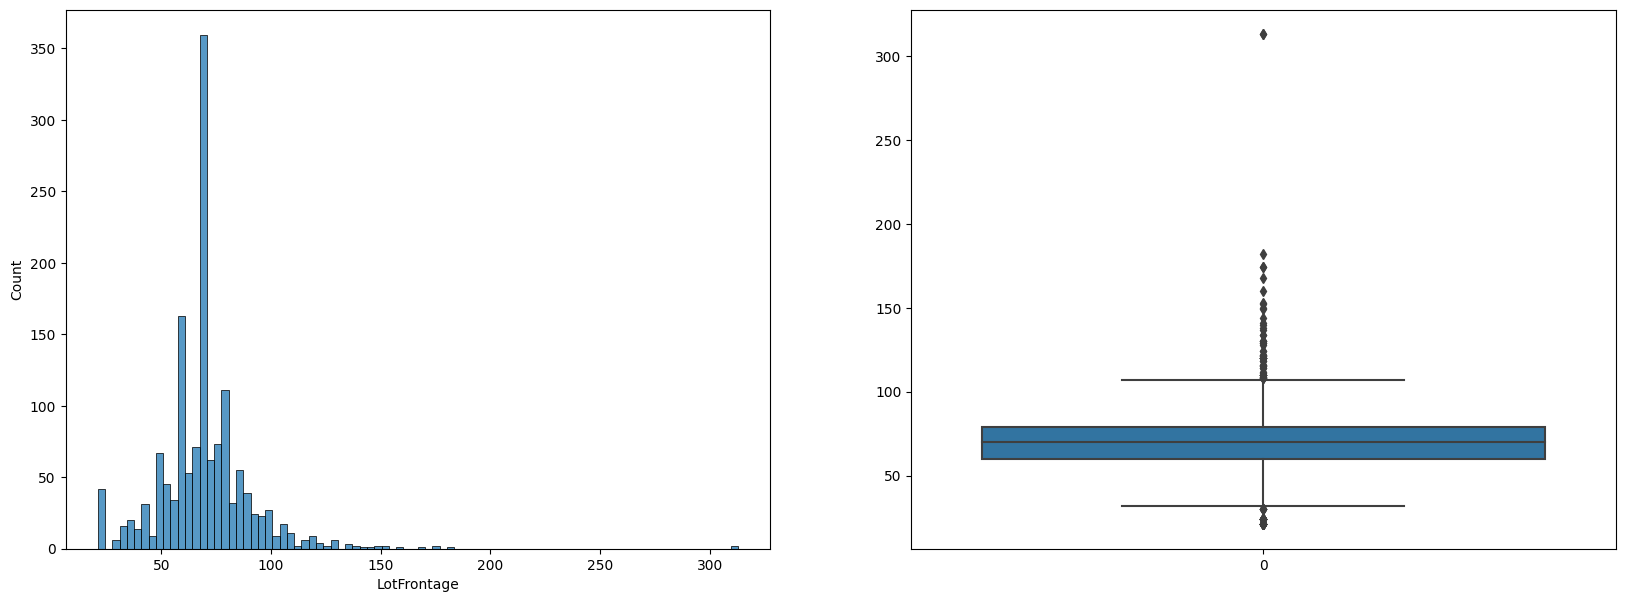

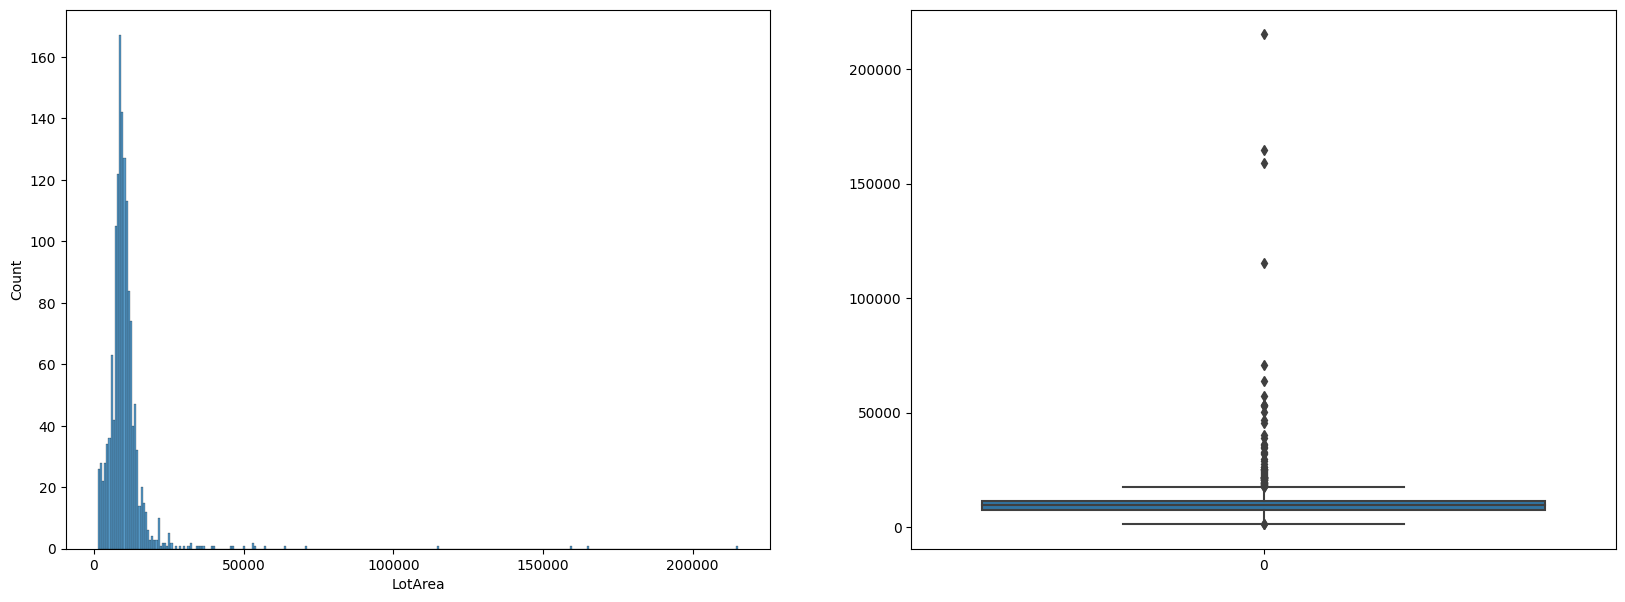

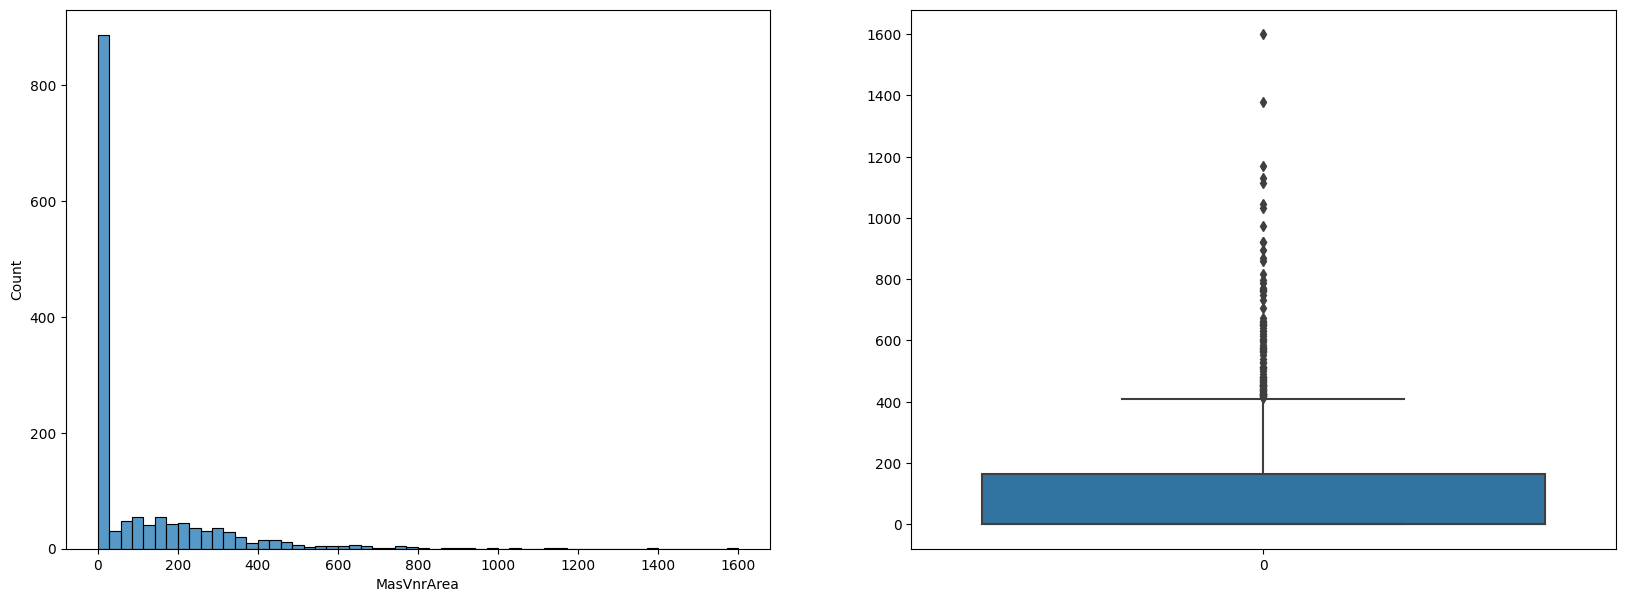

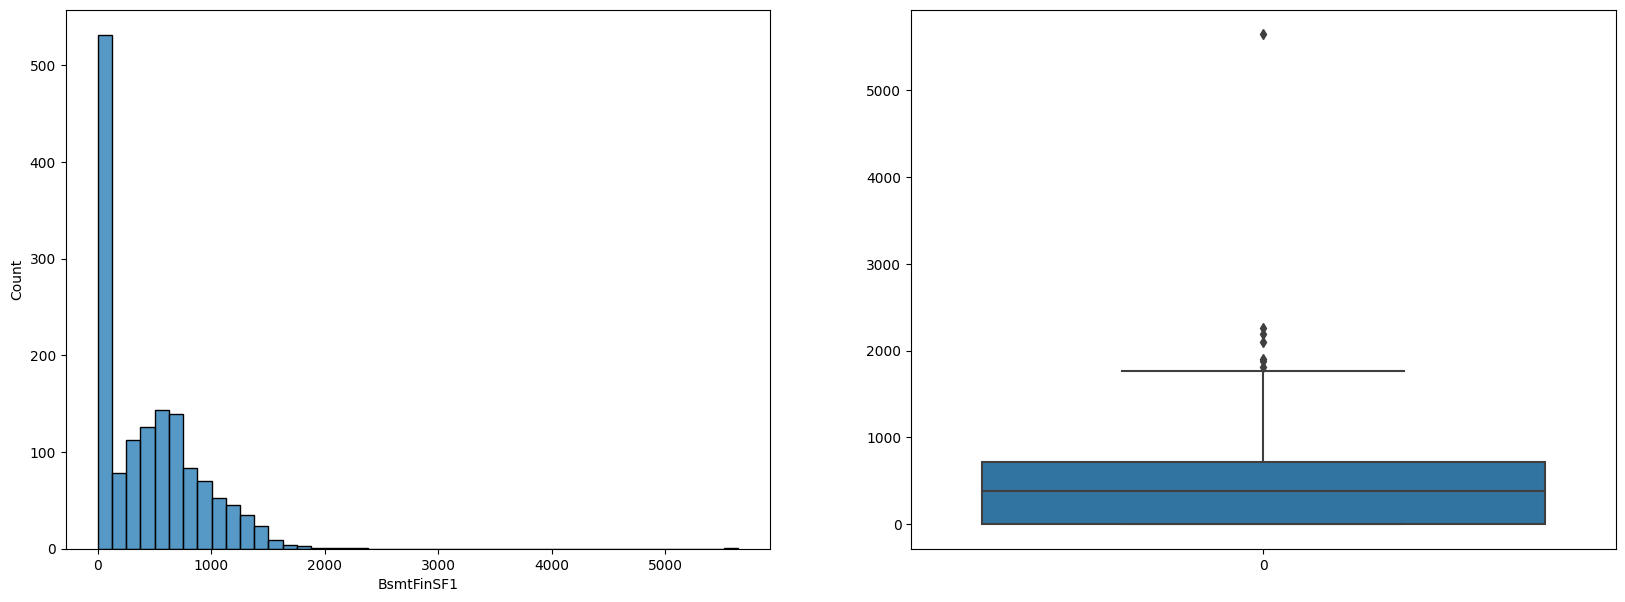

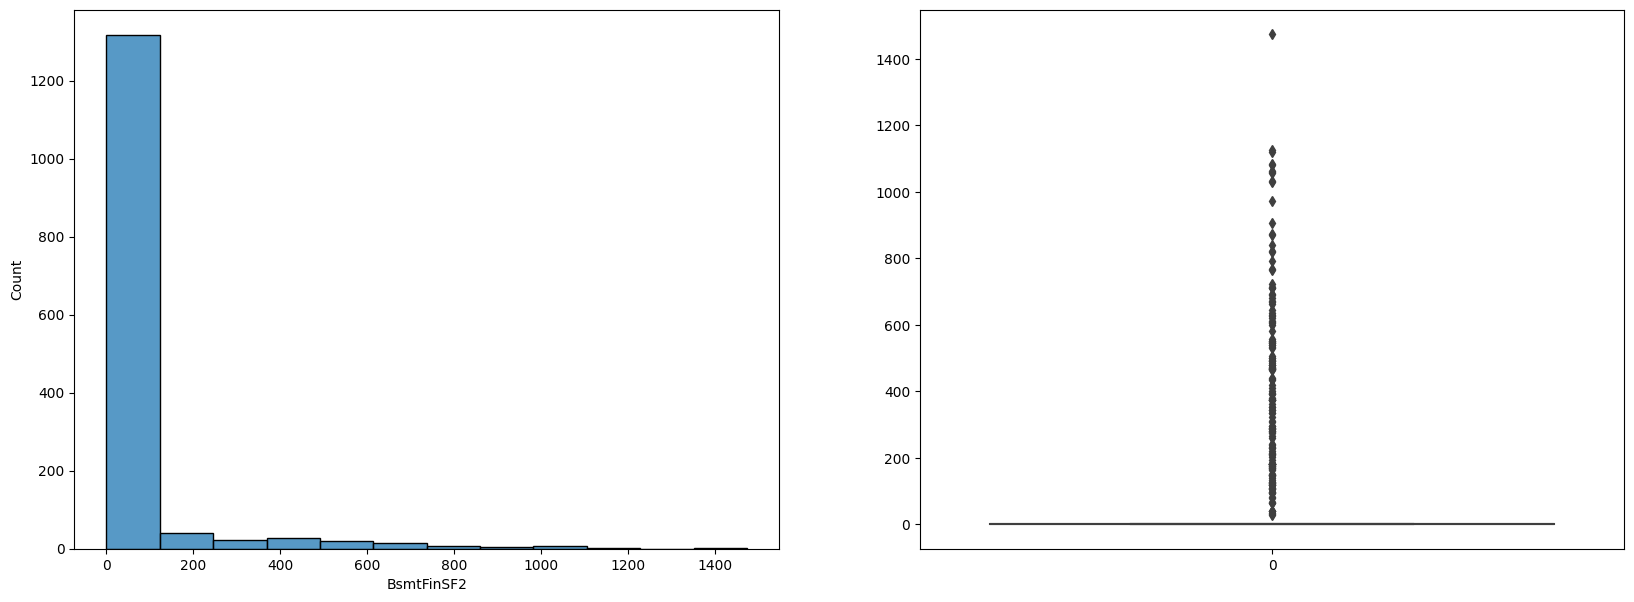

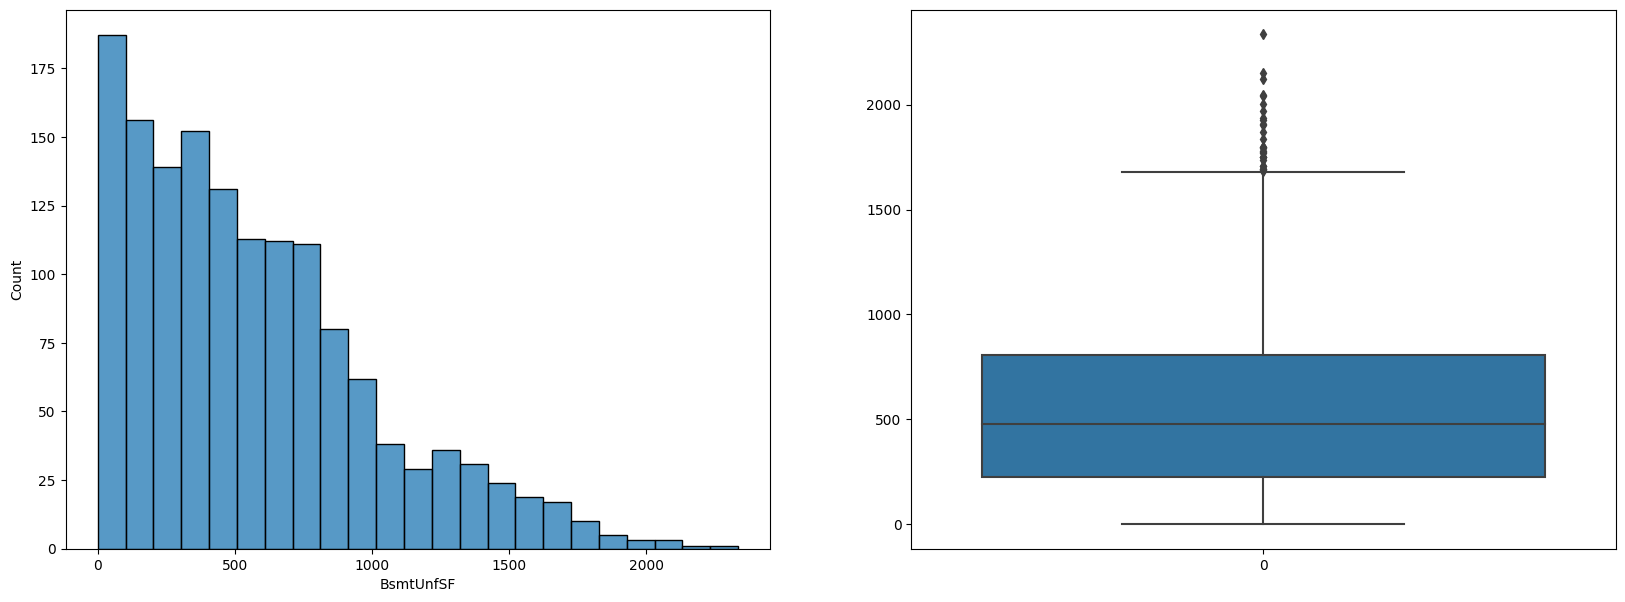

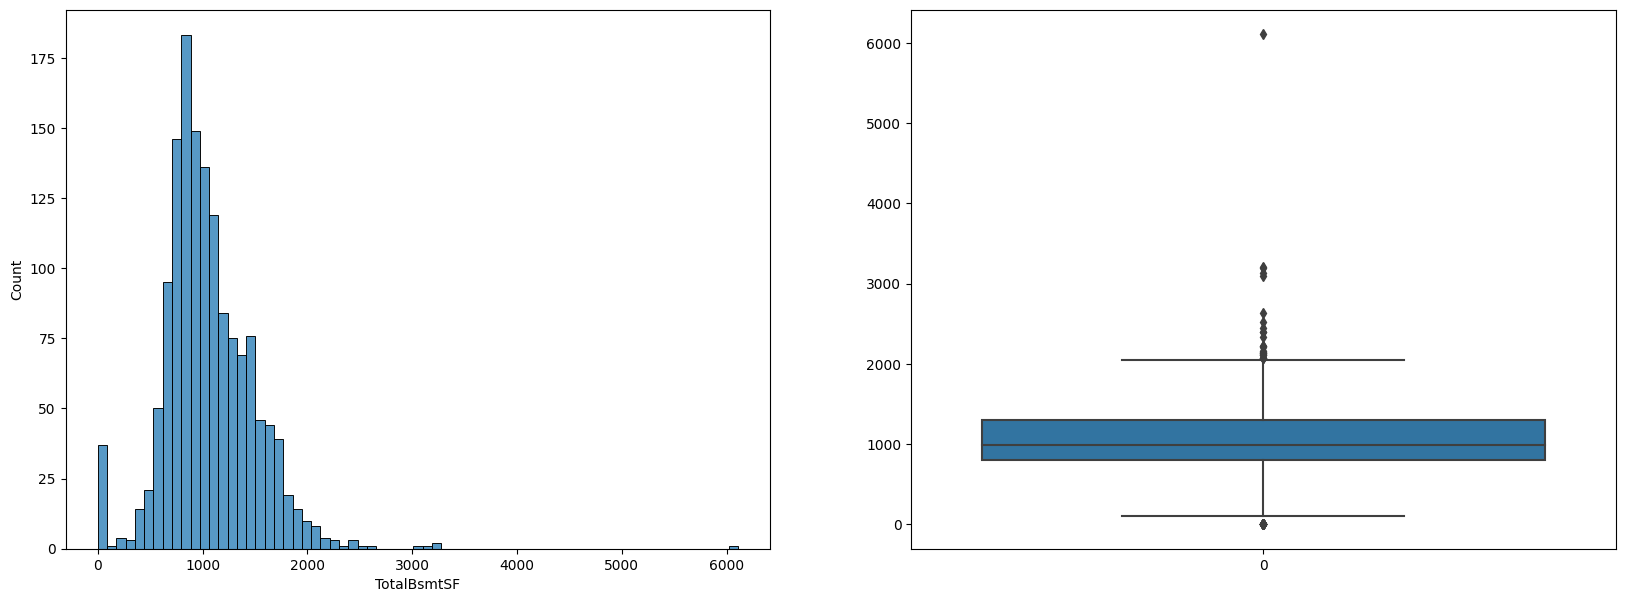

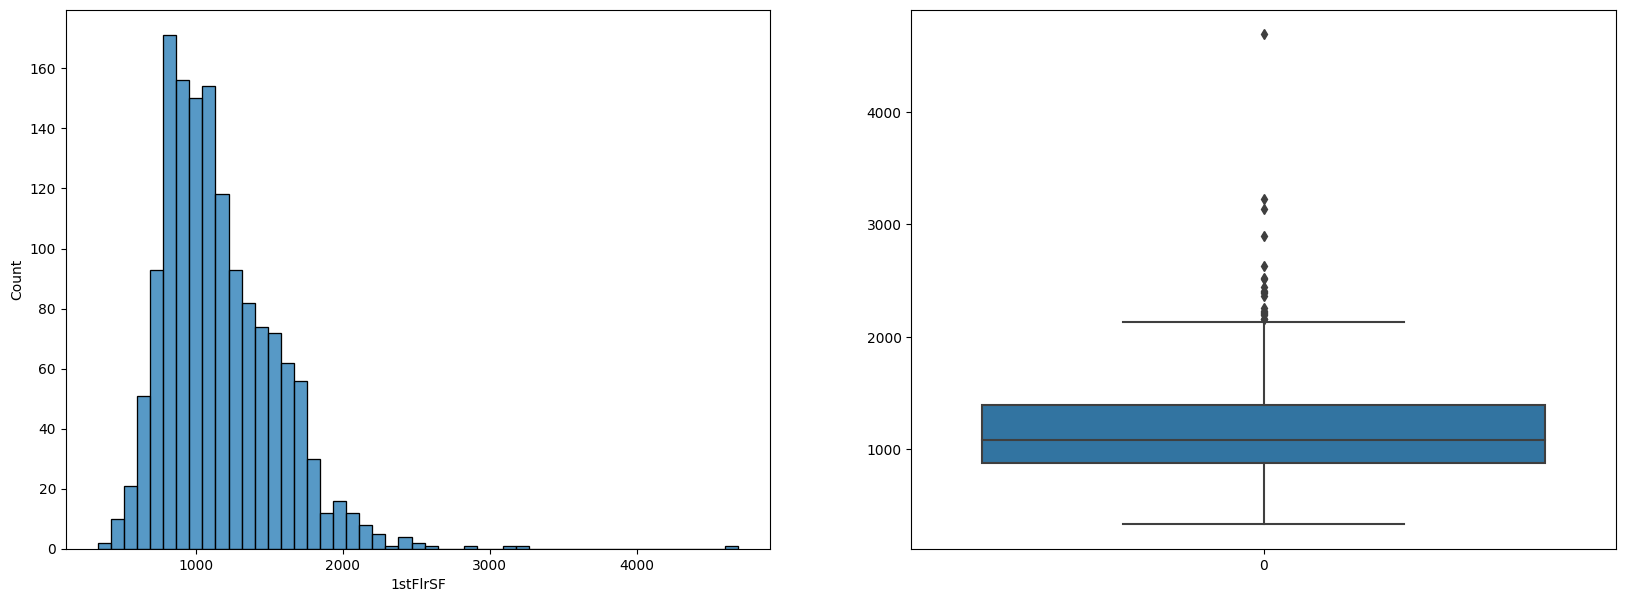

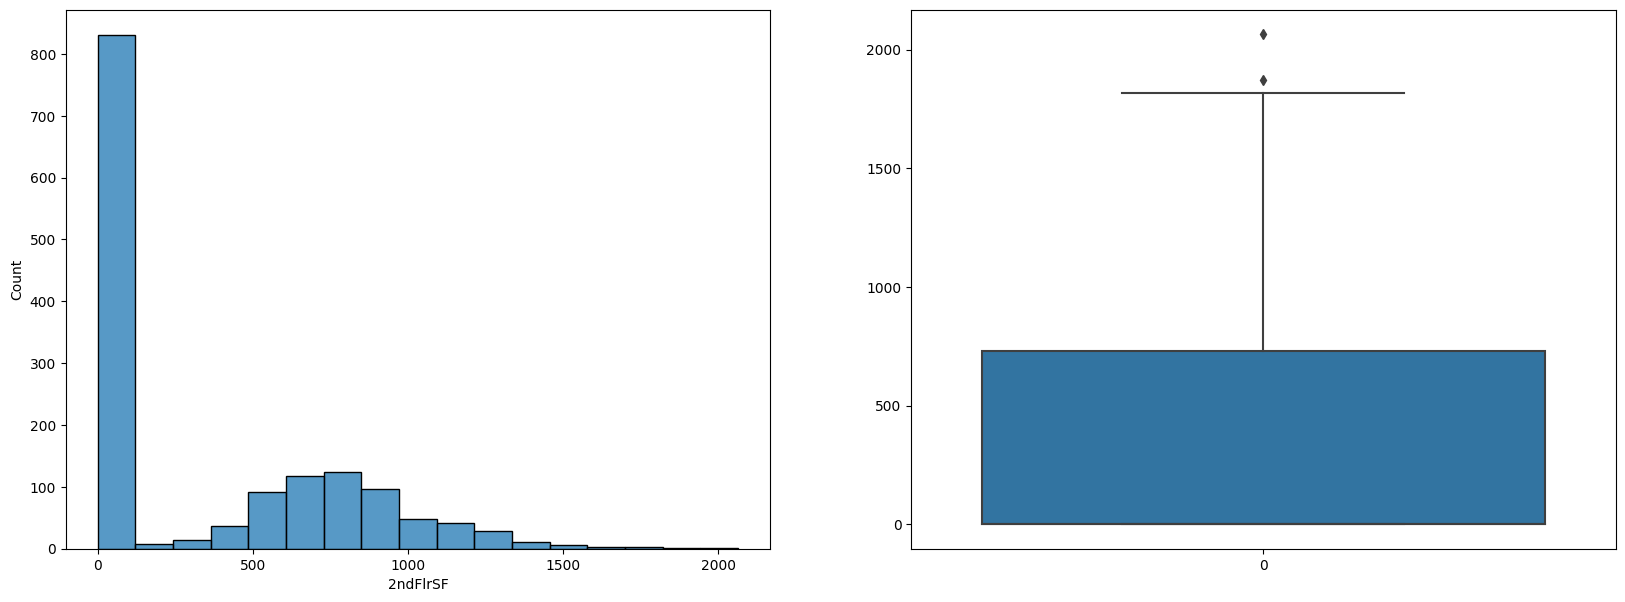

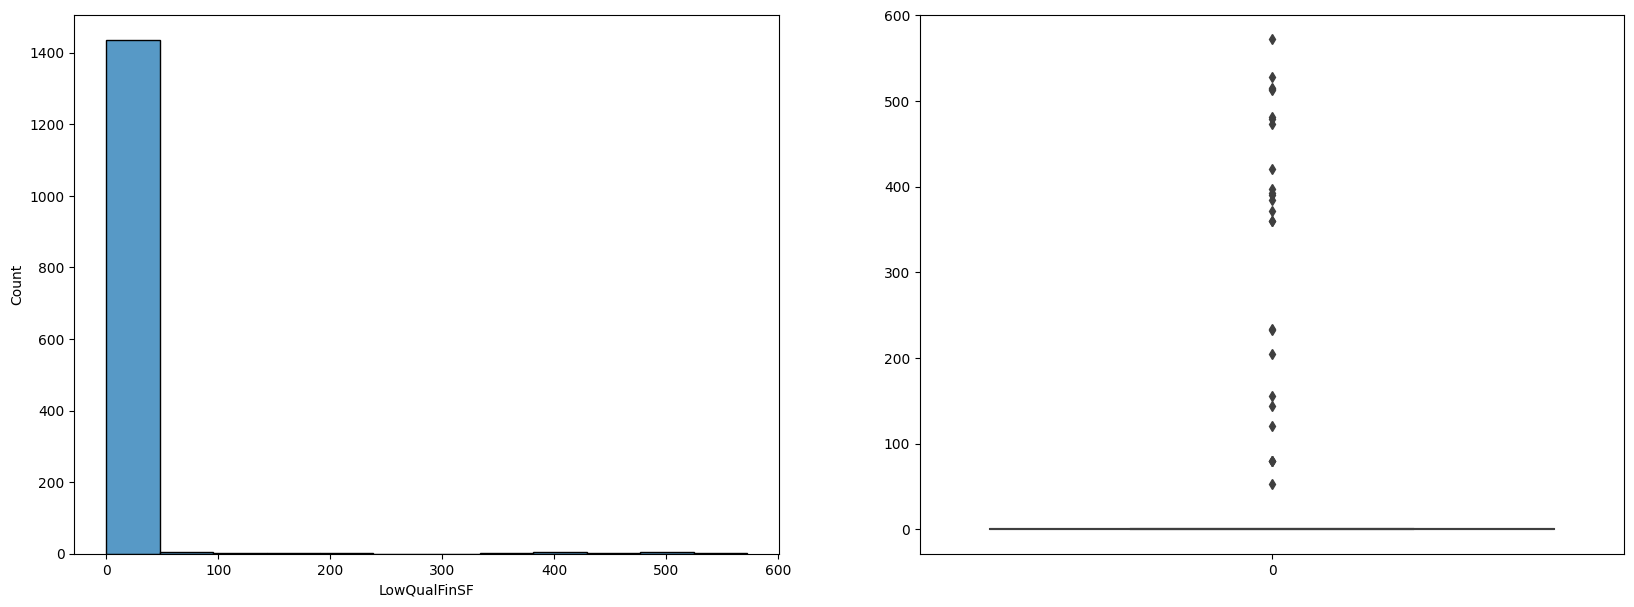

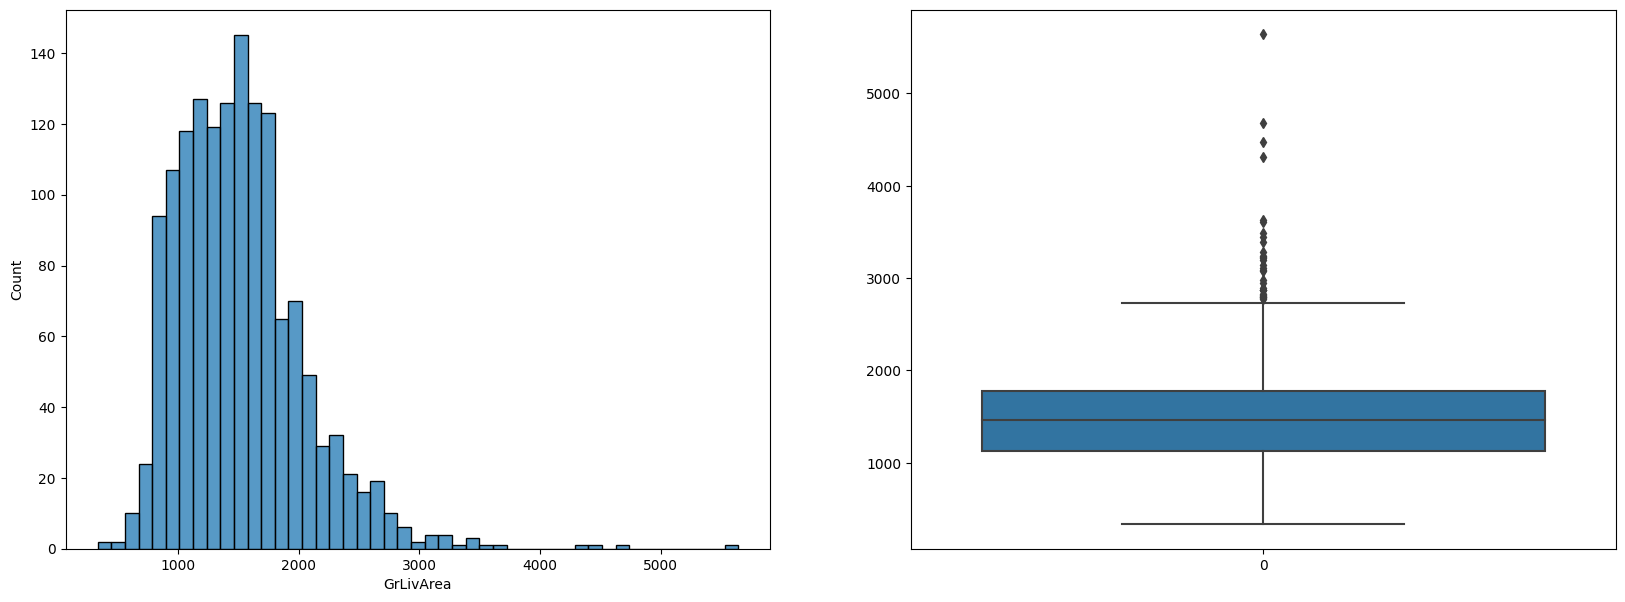

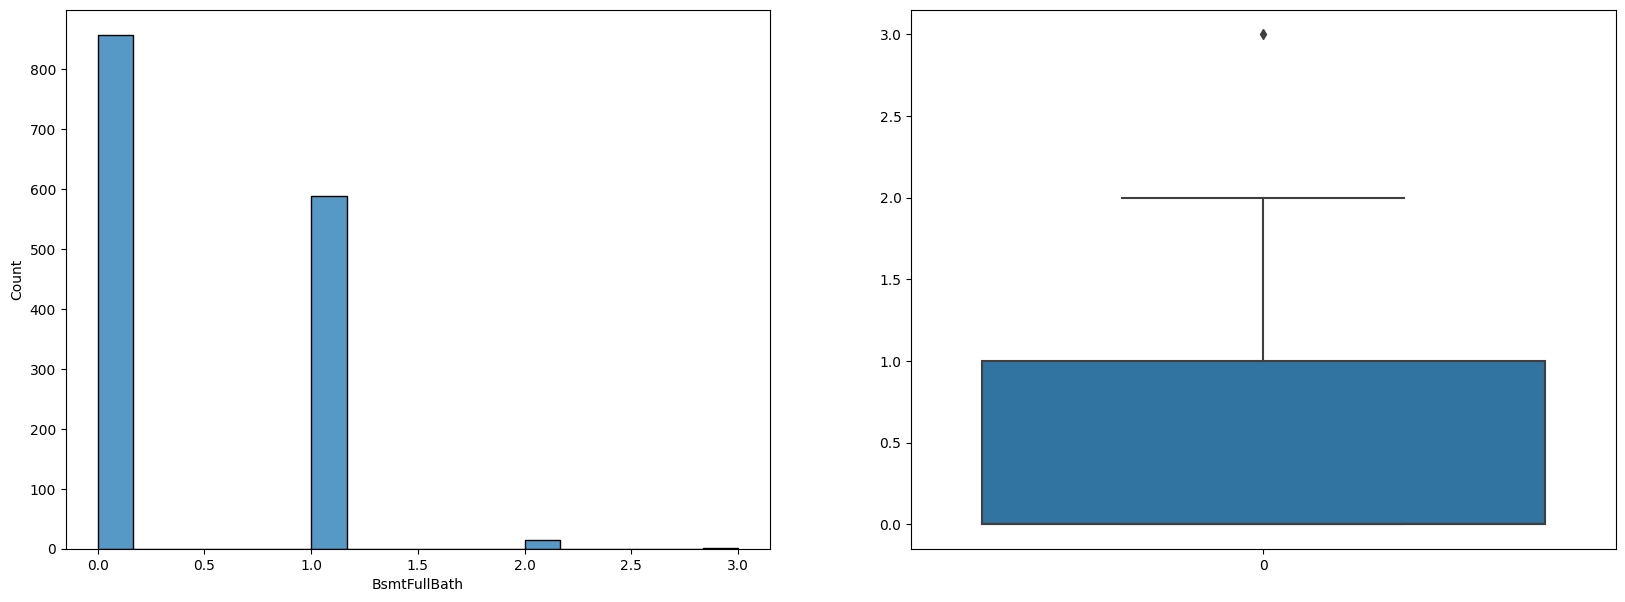

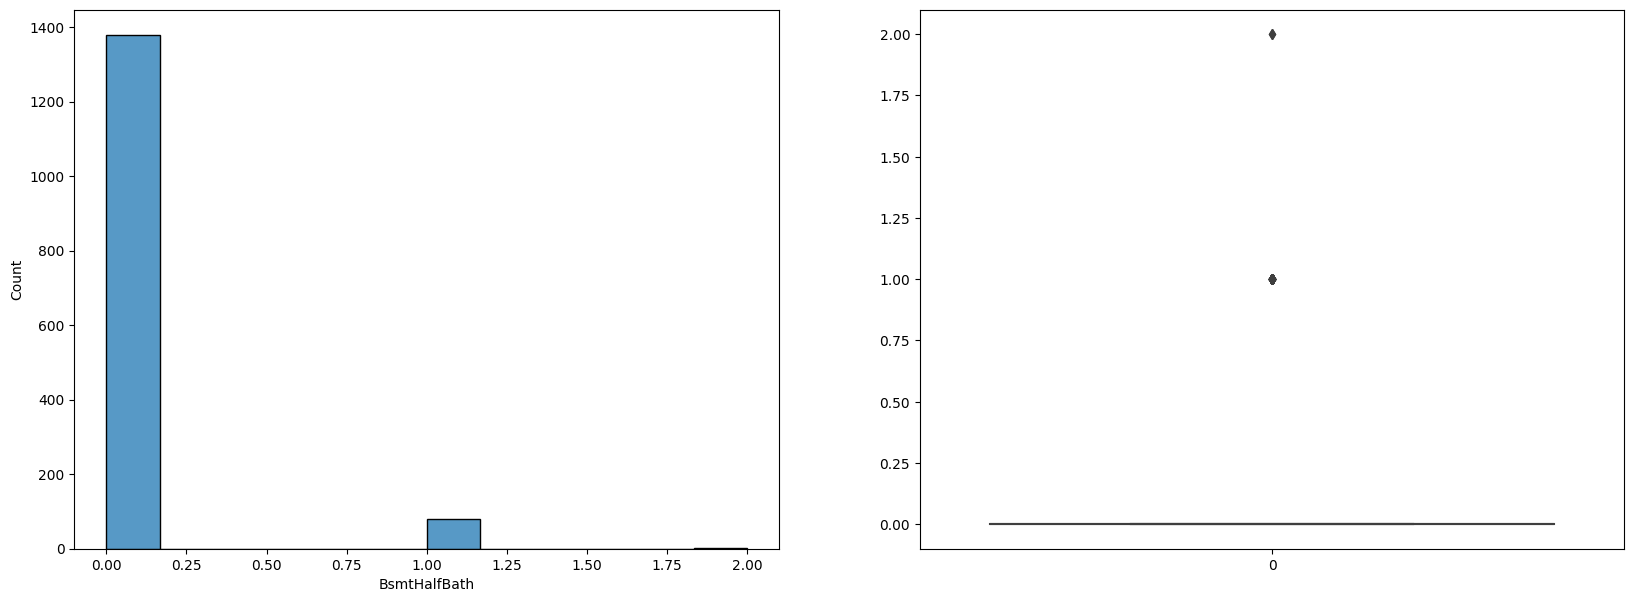

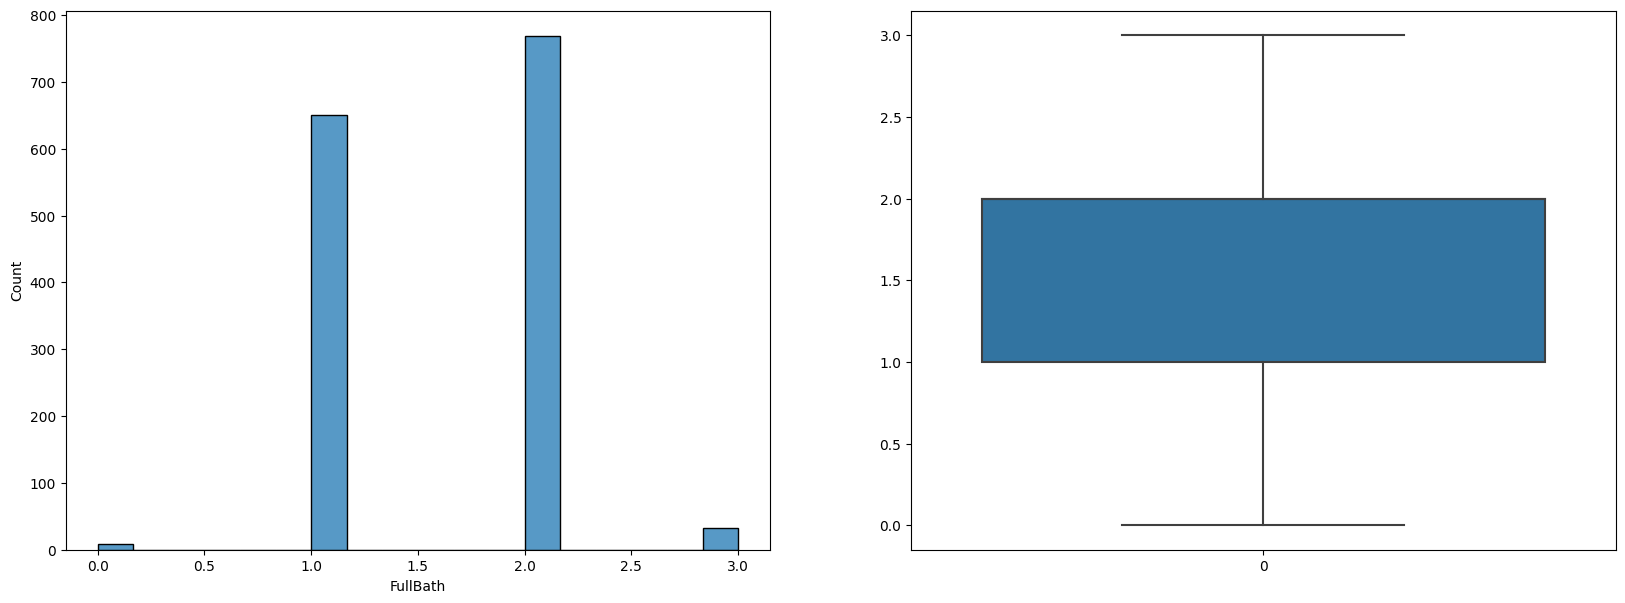

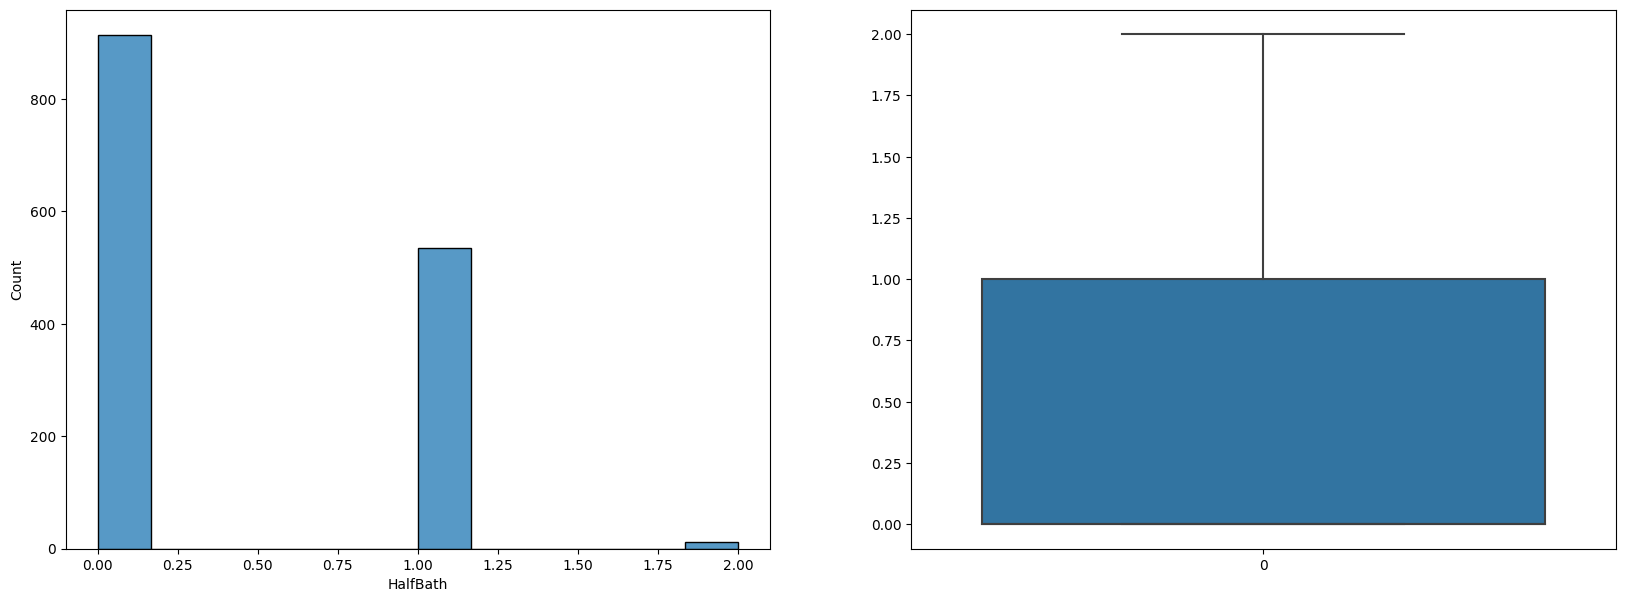

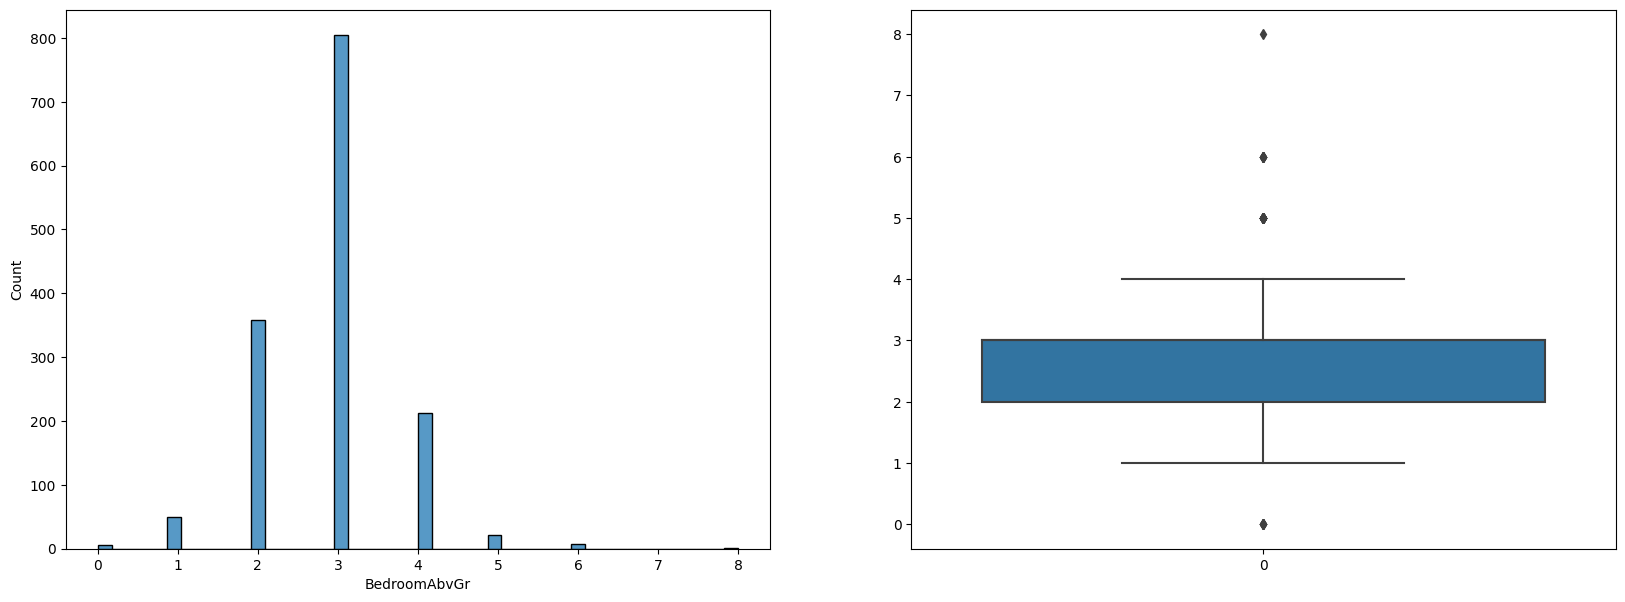

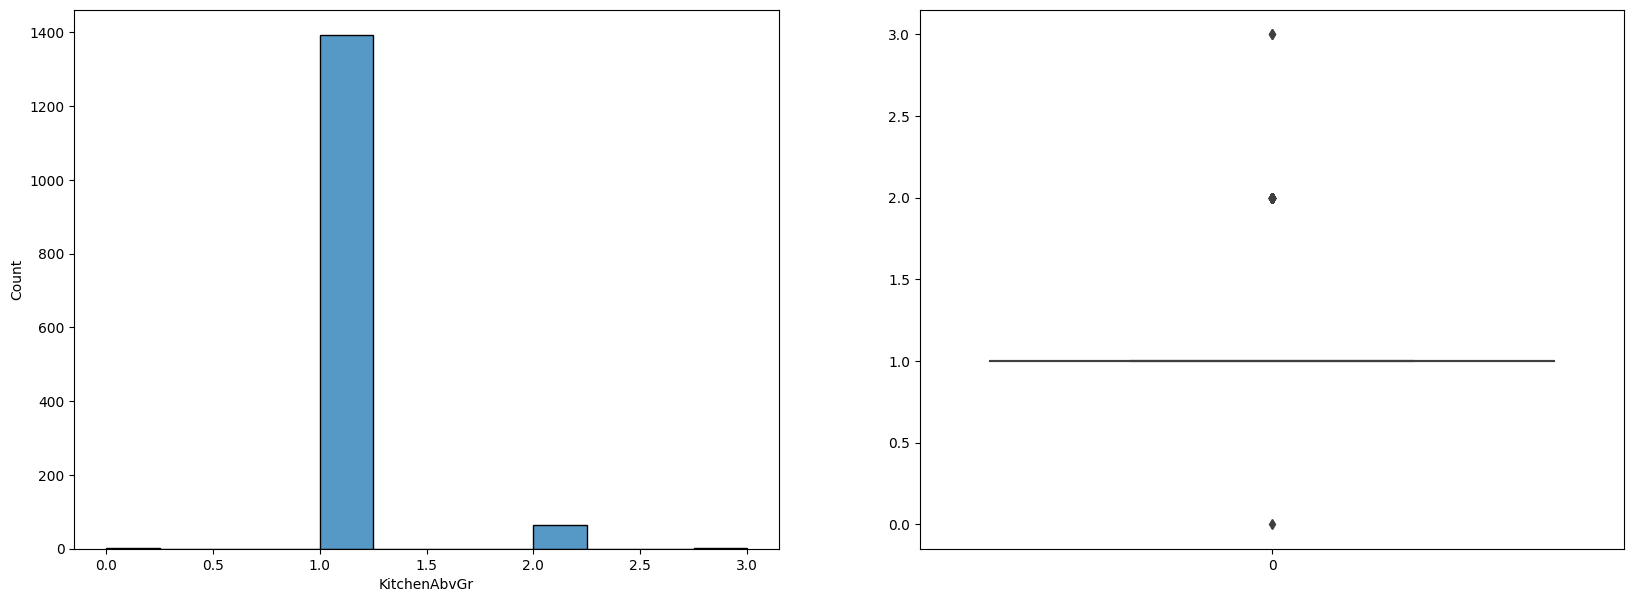

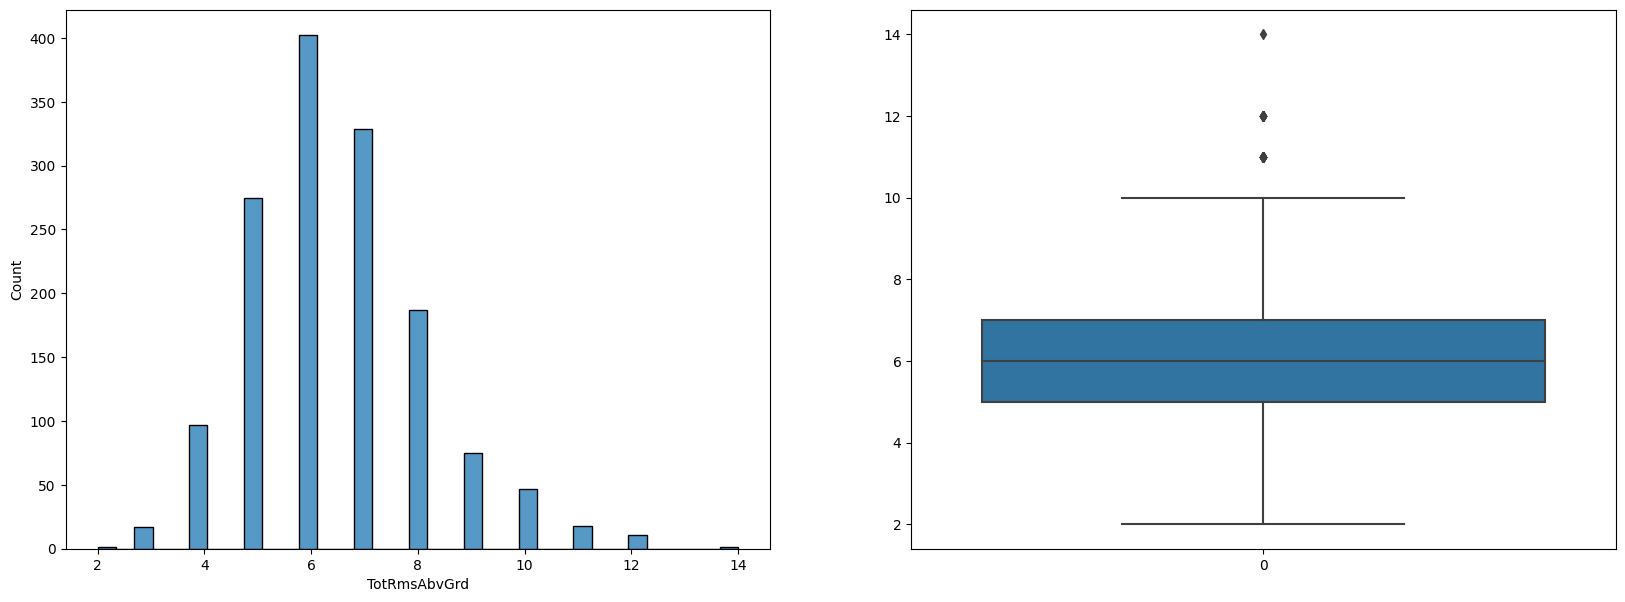

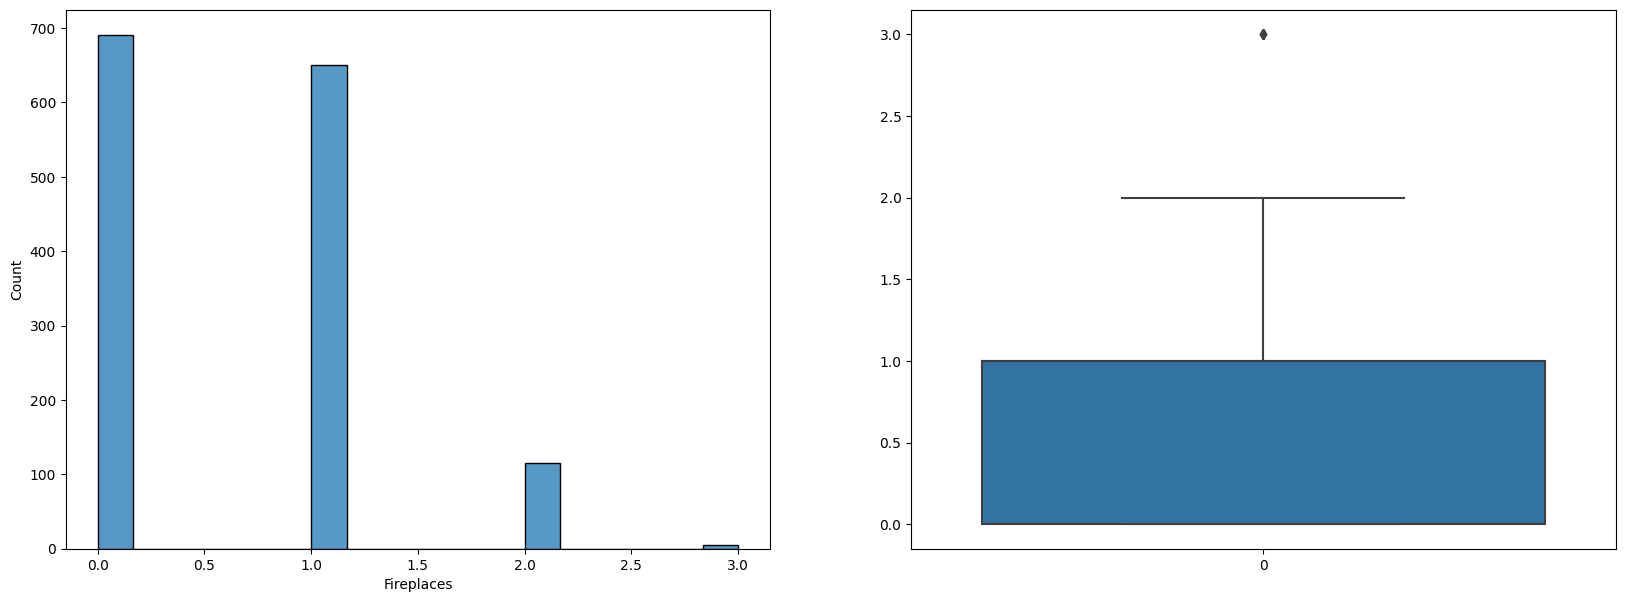

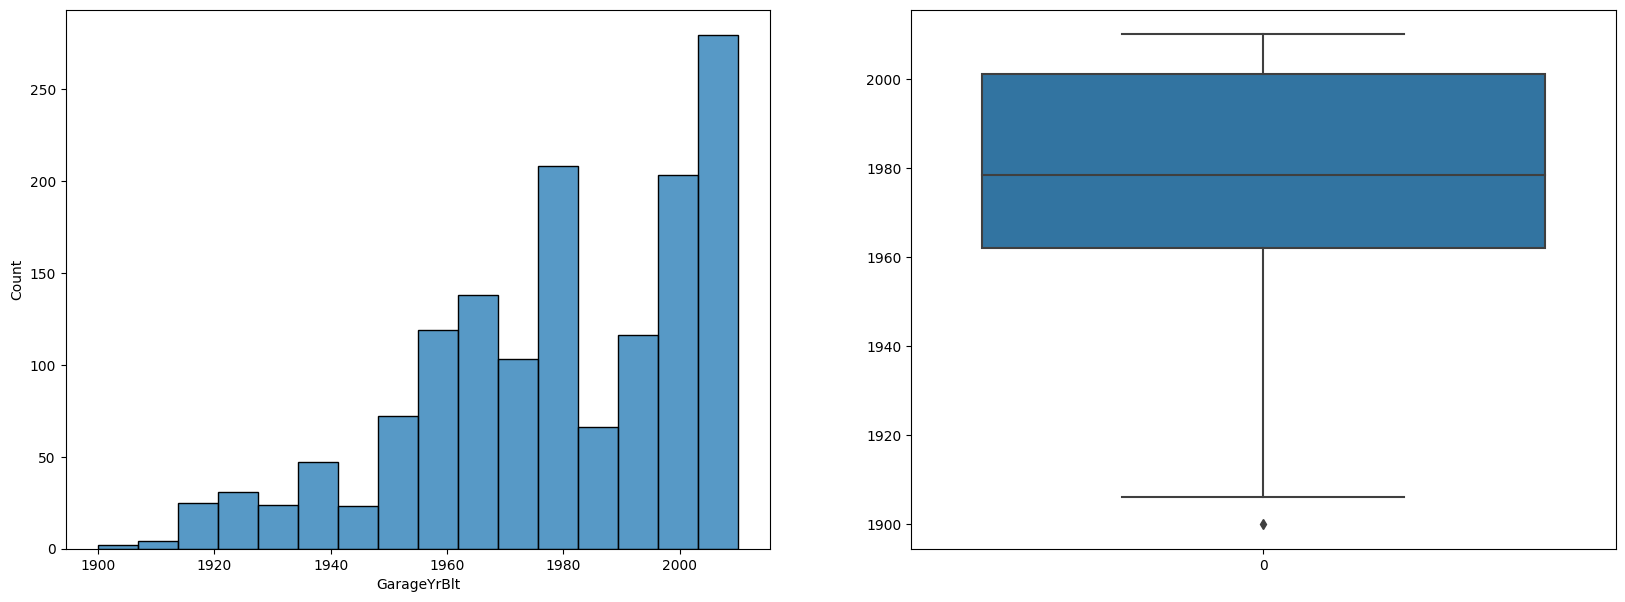

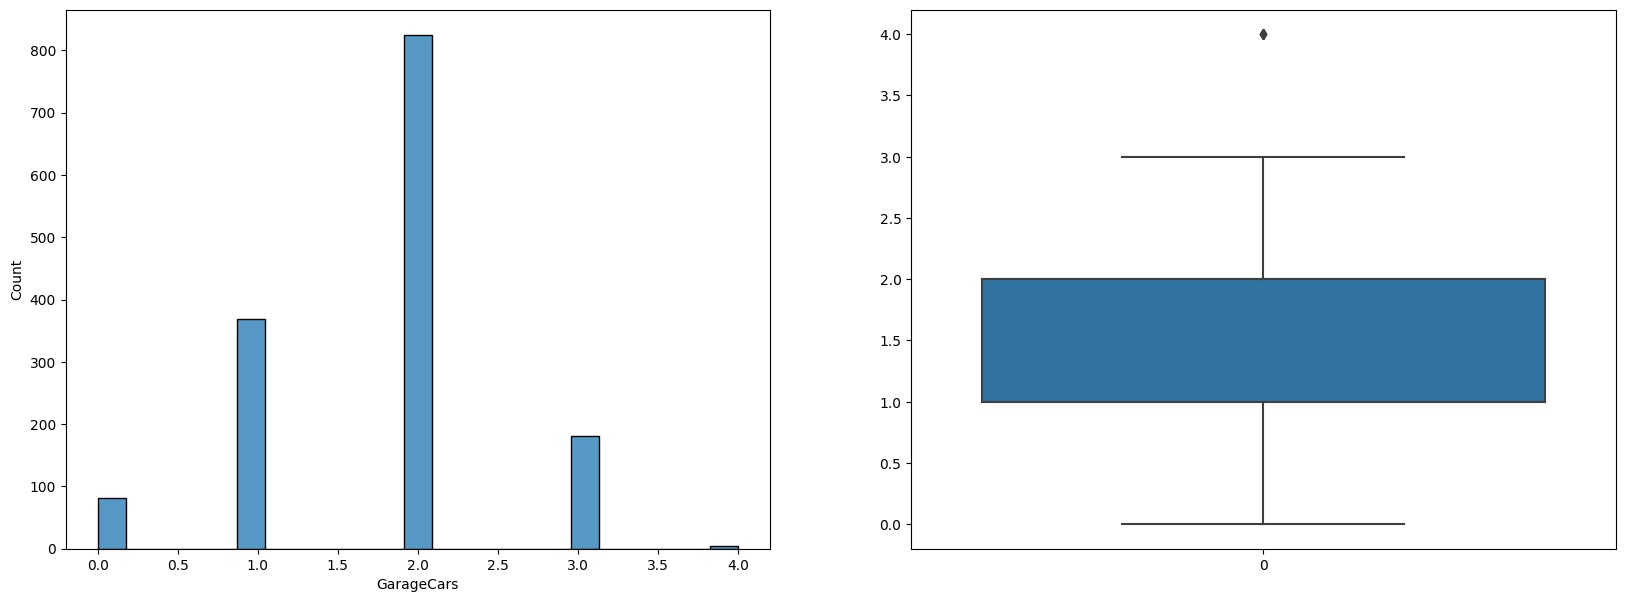

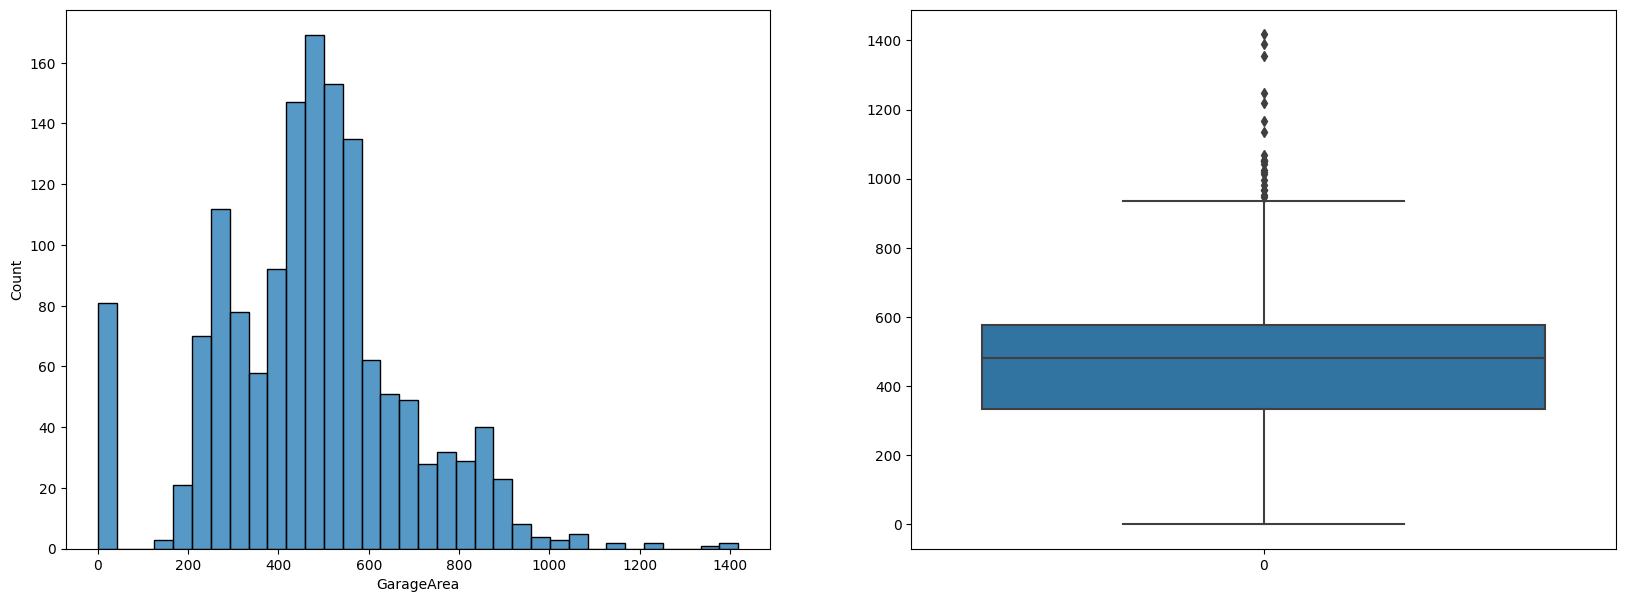

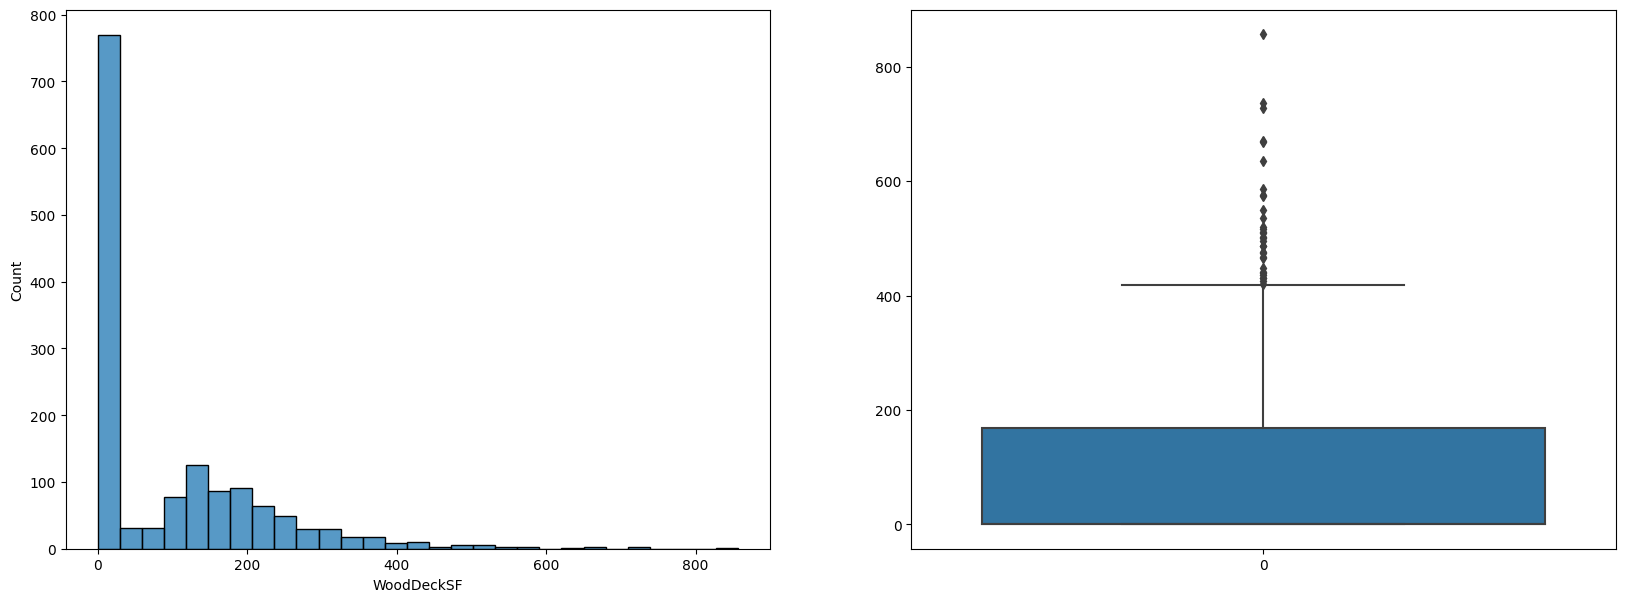

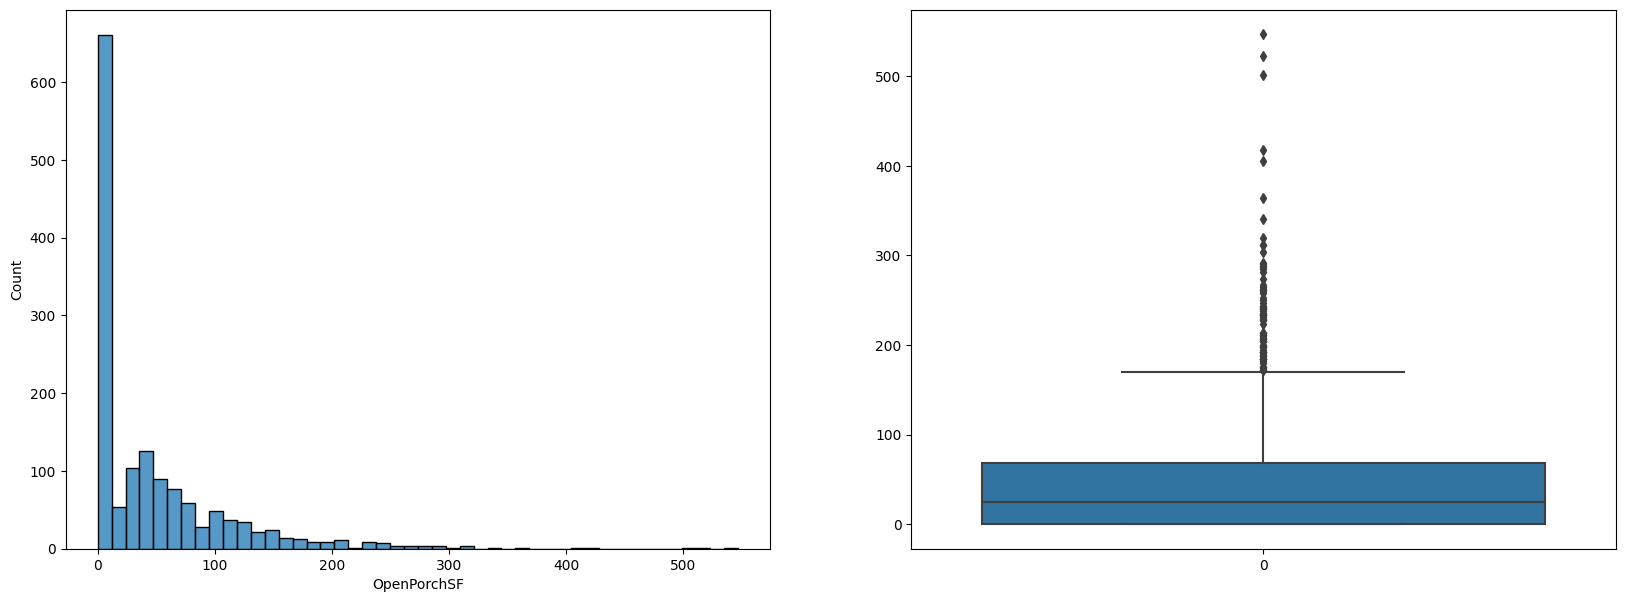

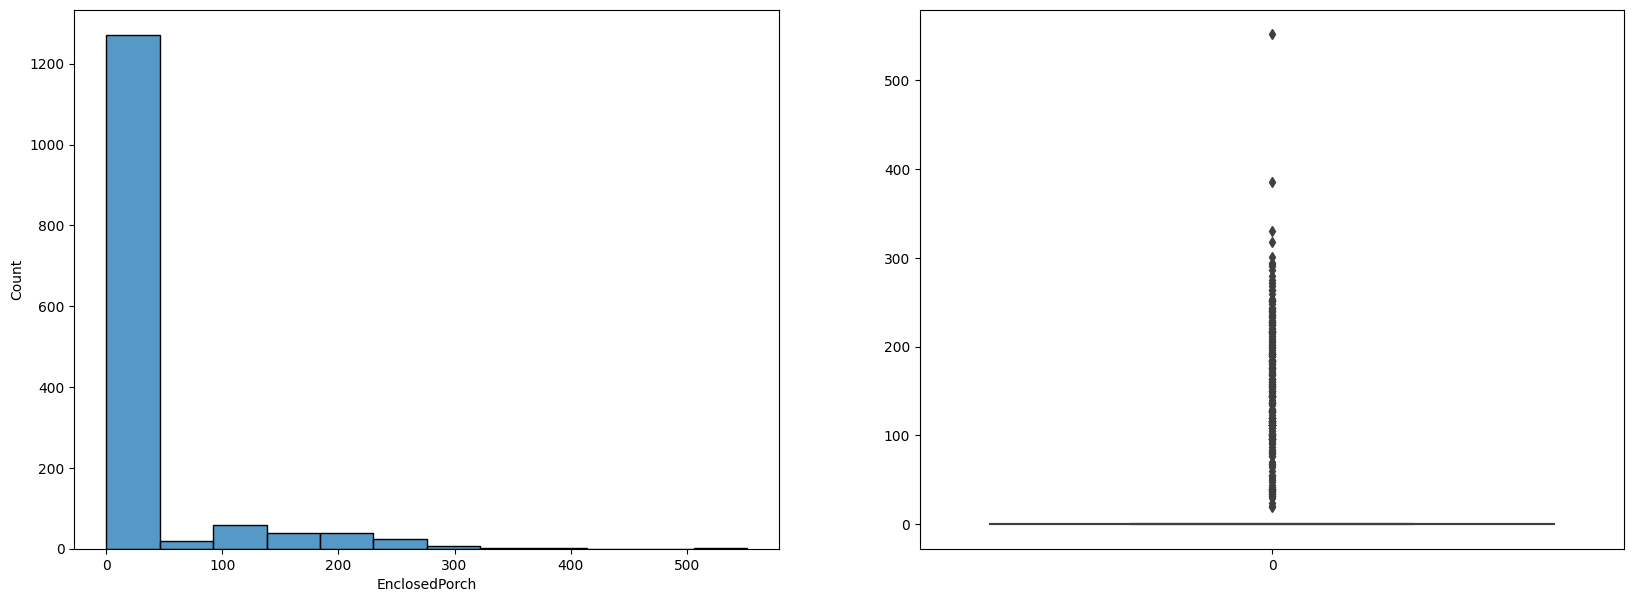

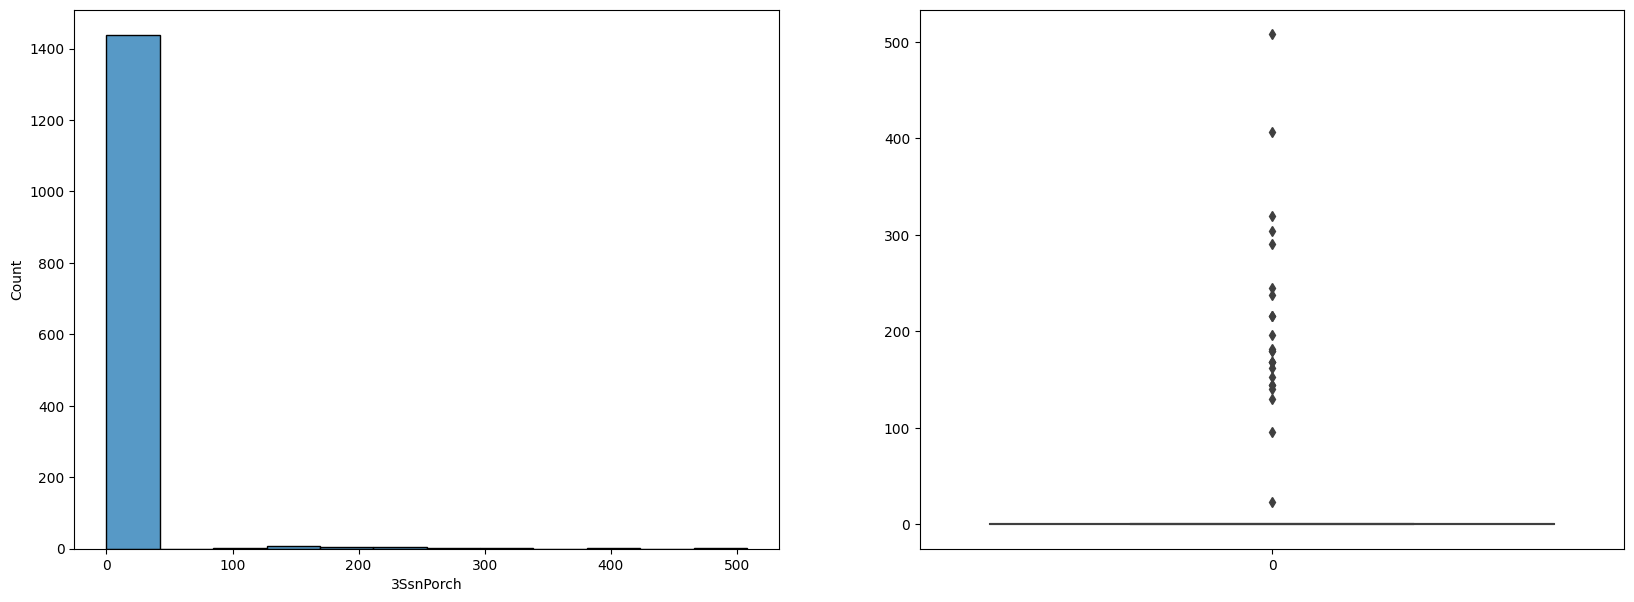

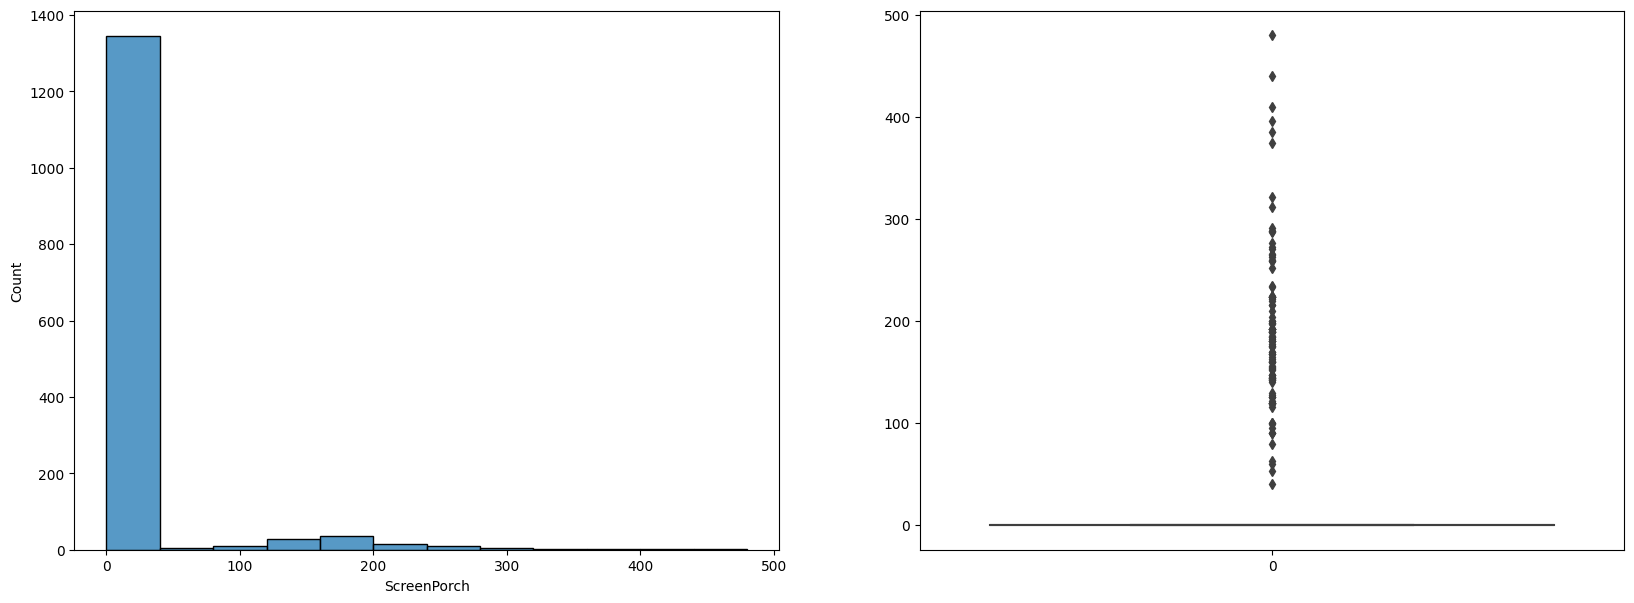

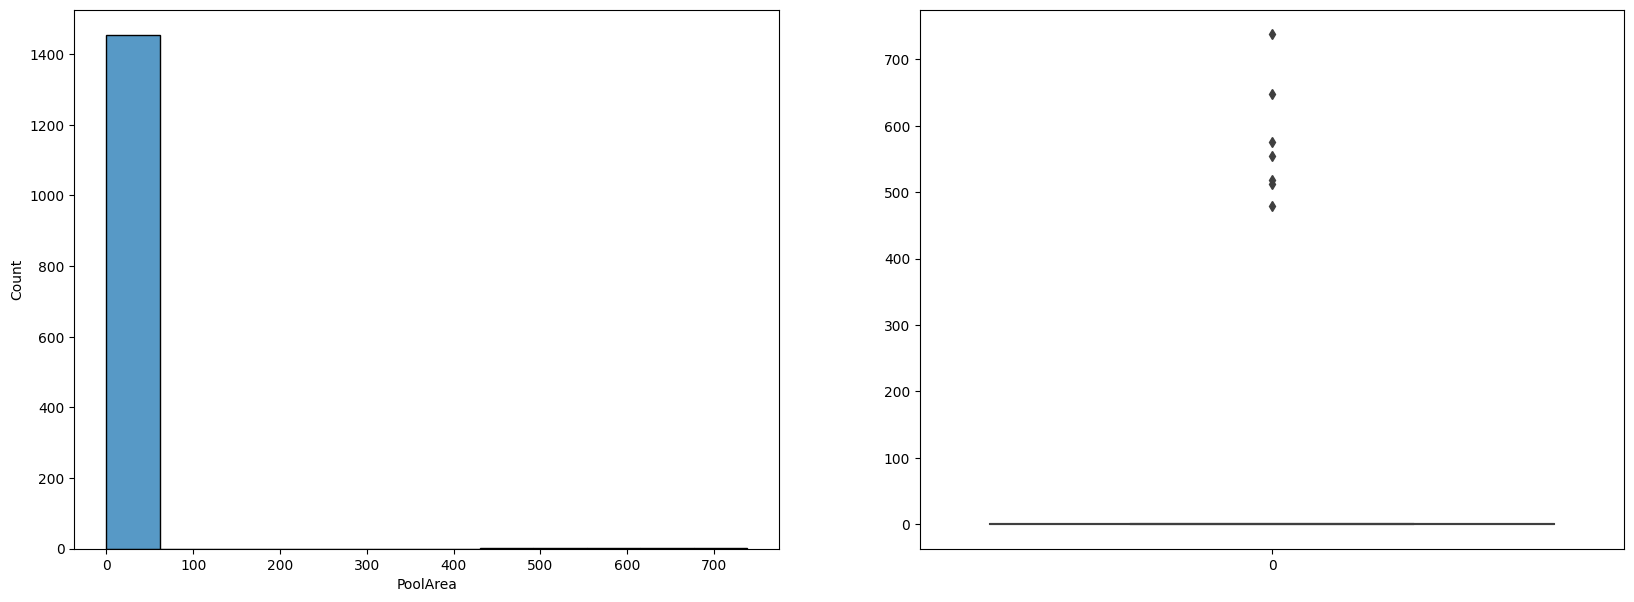

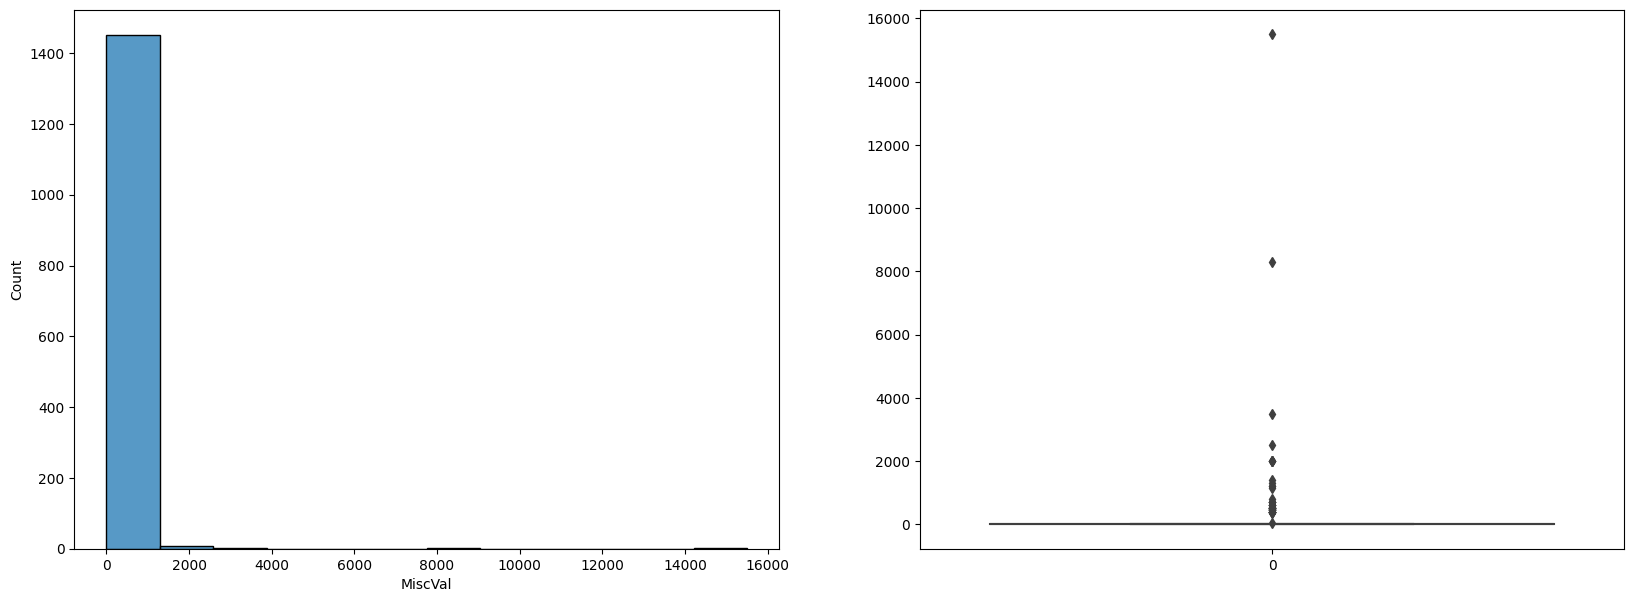

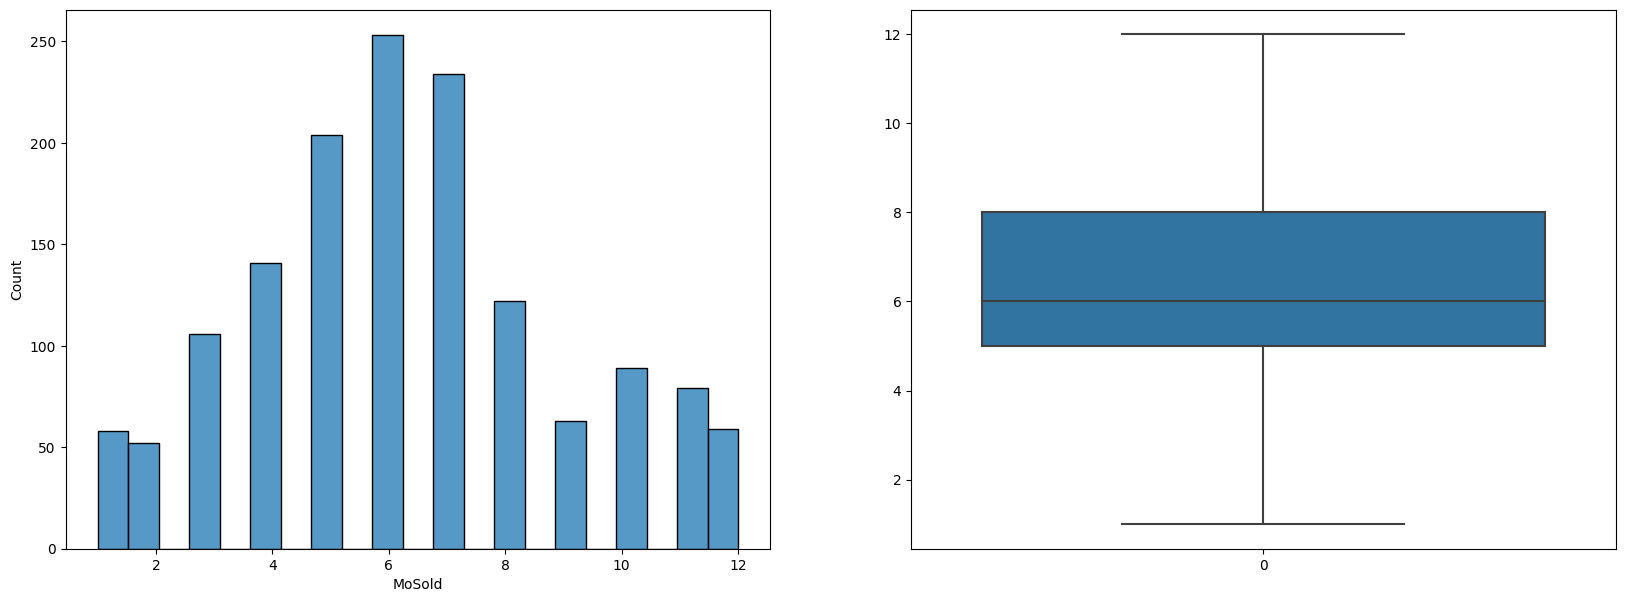

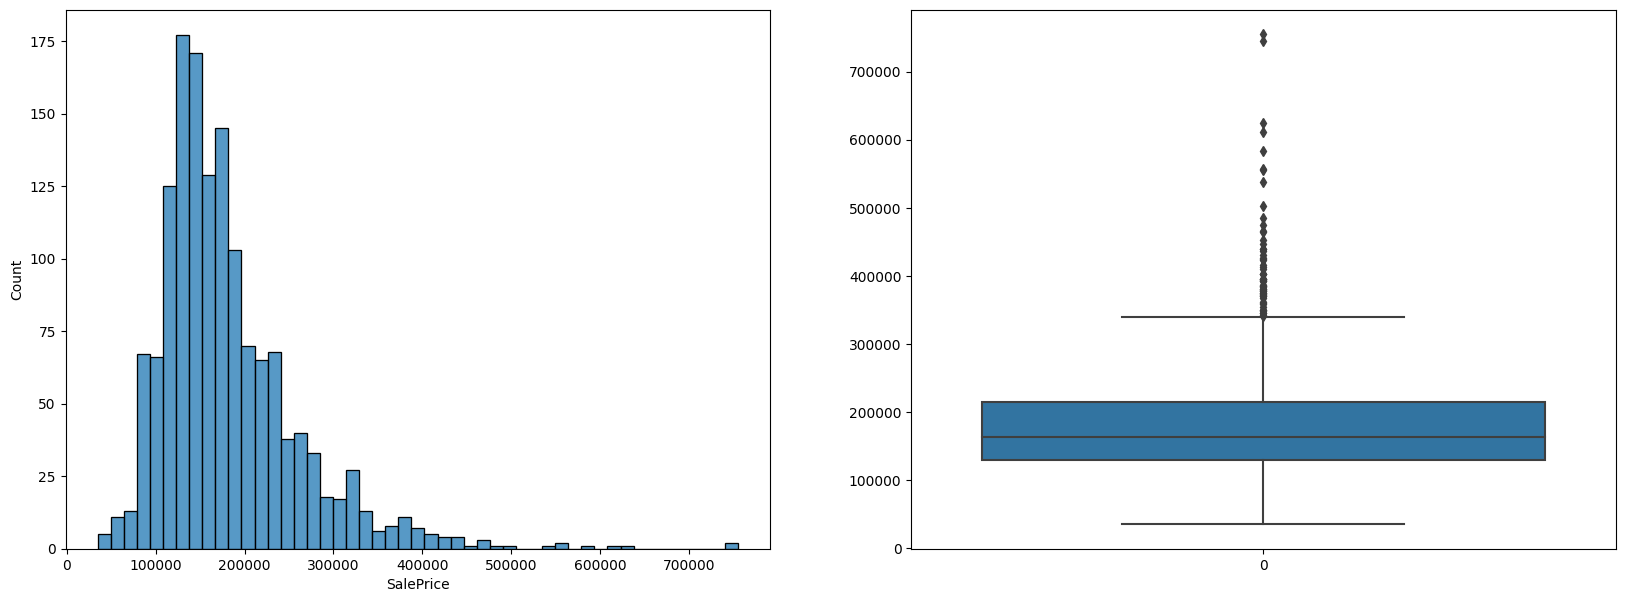

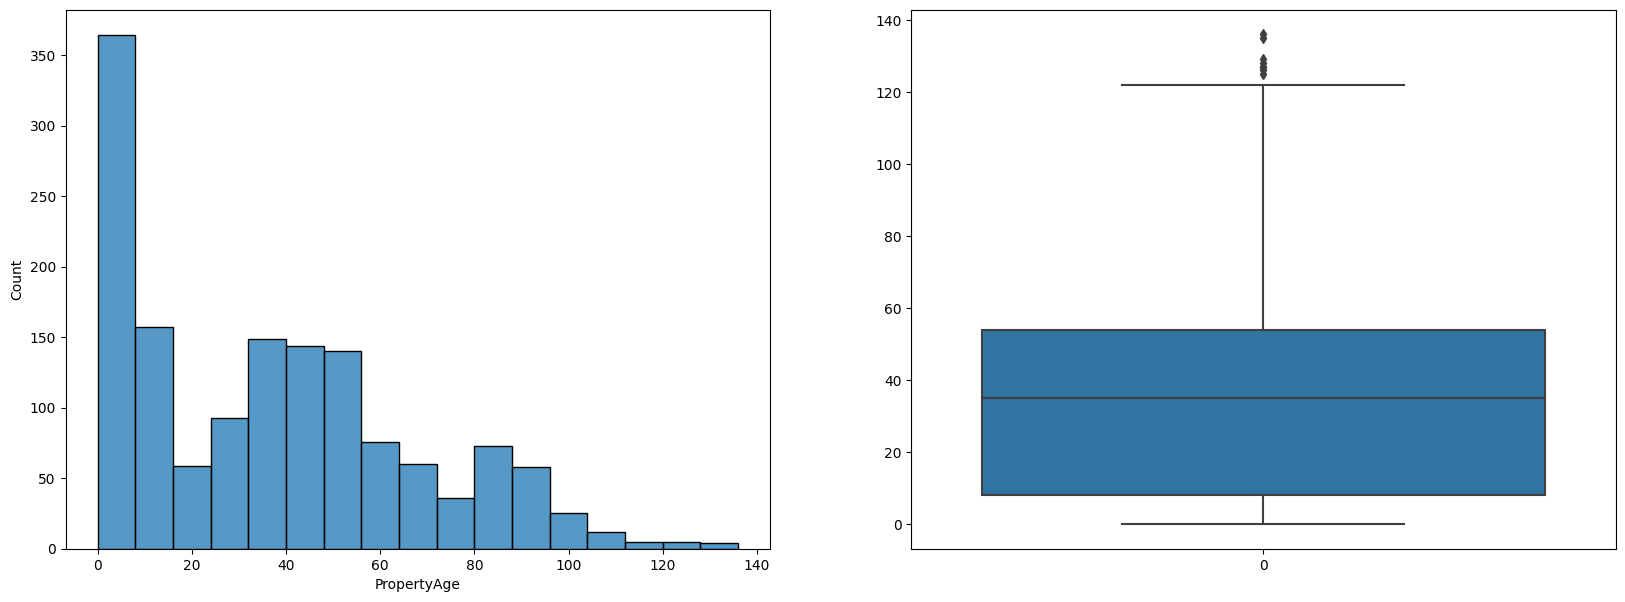

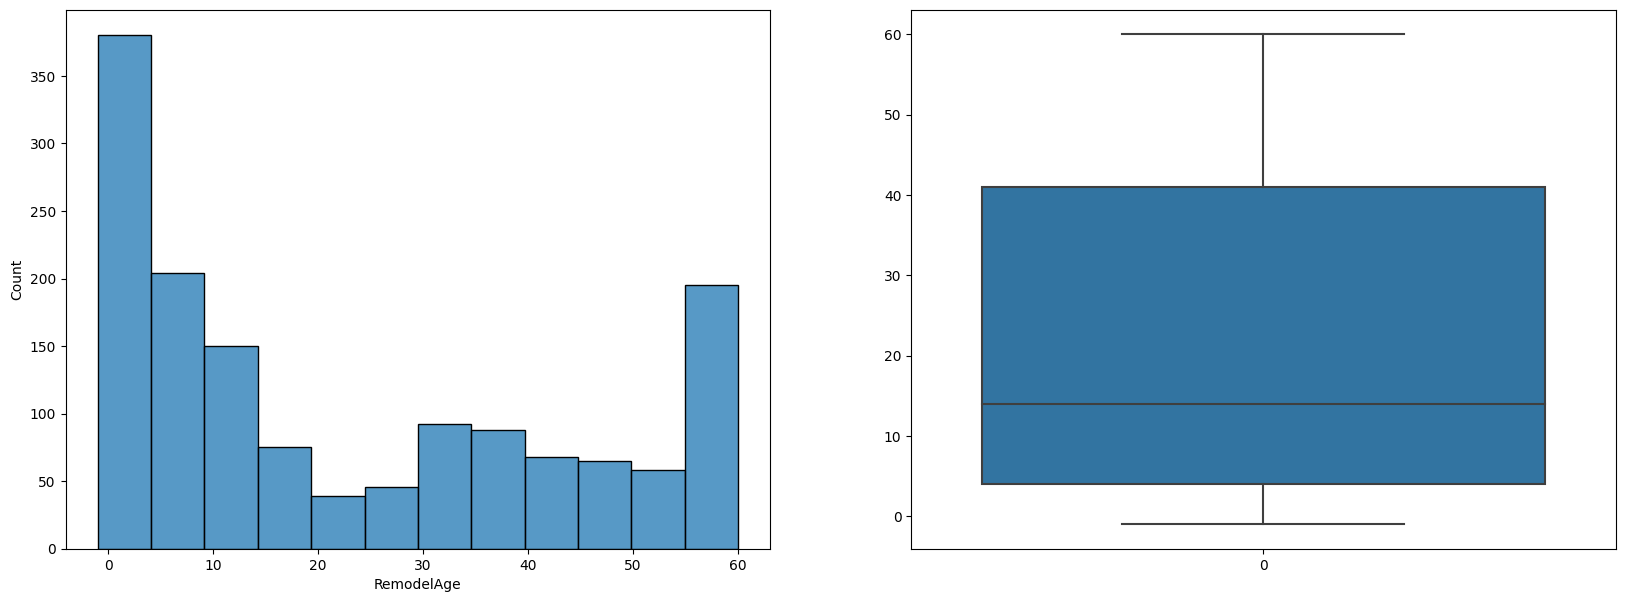

In [162]:
for column in housingData_num.columns:
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.histplot(housingData[column])
    plt.subplot(1,2,2)
    sns.boxplot(housingData[column])
    plt.show()

#Outliers are present in many columns data such as
#LotFrontage, LotArea, MasVnrArea, BsmtFinMS1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, LowQualFinSF, GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,
#OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal, SalePrice, PropertyAge

#So we need to remove Outliers.

In [163]:
#Extract numerical Columns
housingData_num = housingData.select_dtypes(include=['int64', 'float64'])
print(housingData_num.shape)
#Extract Categorical variables
housingData_obj = housingData.select_dtypes(include=['object'])
print(housingData_obj.shape)


(1460, 33)
(1460, 46)


In [164]:
#Check the  Skewness of Target Variable
housingData['SalePrice'].skew()

#Inference: Skewness is approx one, so we need to transform our target Data

1.8828757597682129

In [165]:
housingData['SalePrice'] = np.log(housingData['SalePrice'])

In [166]:
#Check the  Skewness of Target Variable
housingData['SalePrice'].skew()

#Skewness looks good now.



0.12133506220520406

In [167]:
index = 0
for column in housingData_obj.columns:
    print(column)
    housingData_obj[column].value_counts().plot.bar()
    index = index +1
    plt.show()

#Some Columns have dominating values but no comlumns are having single value, so cannot remove it

MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


# BiVariate Analysis

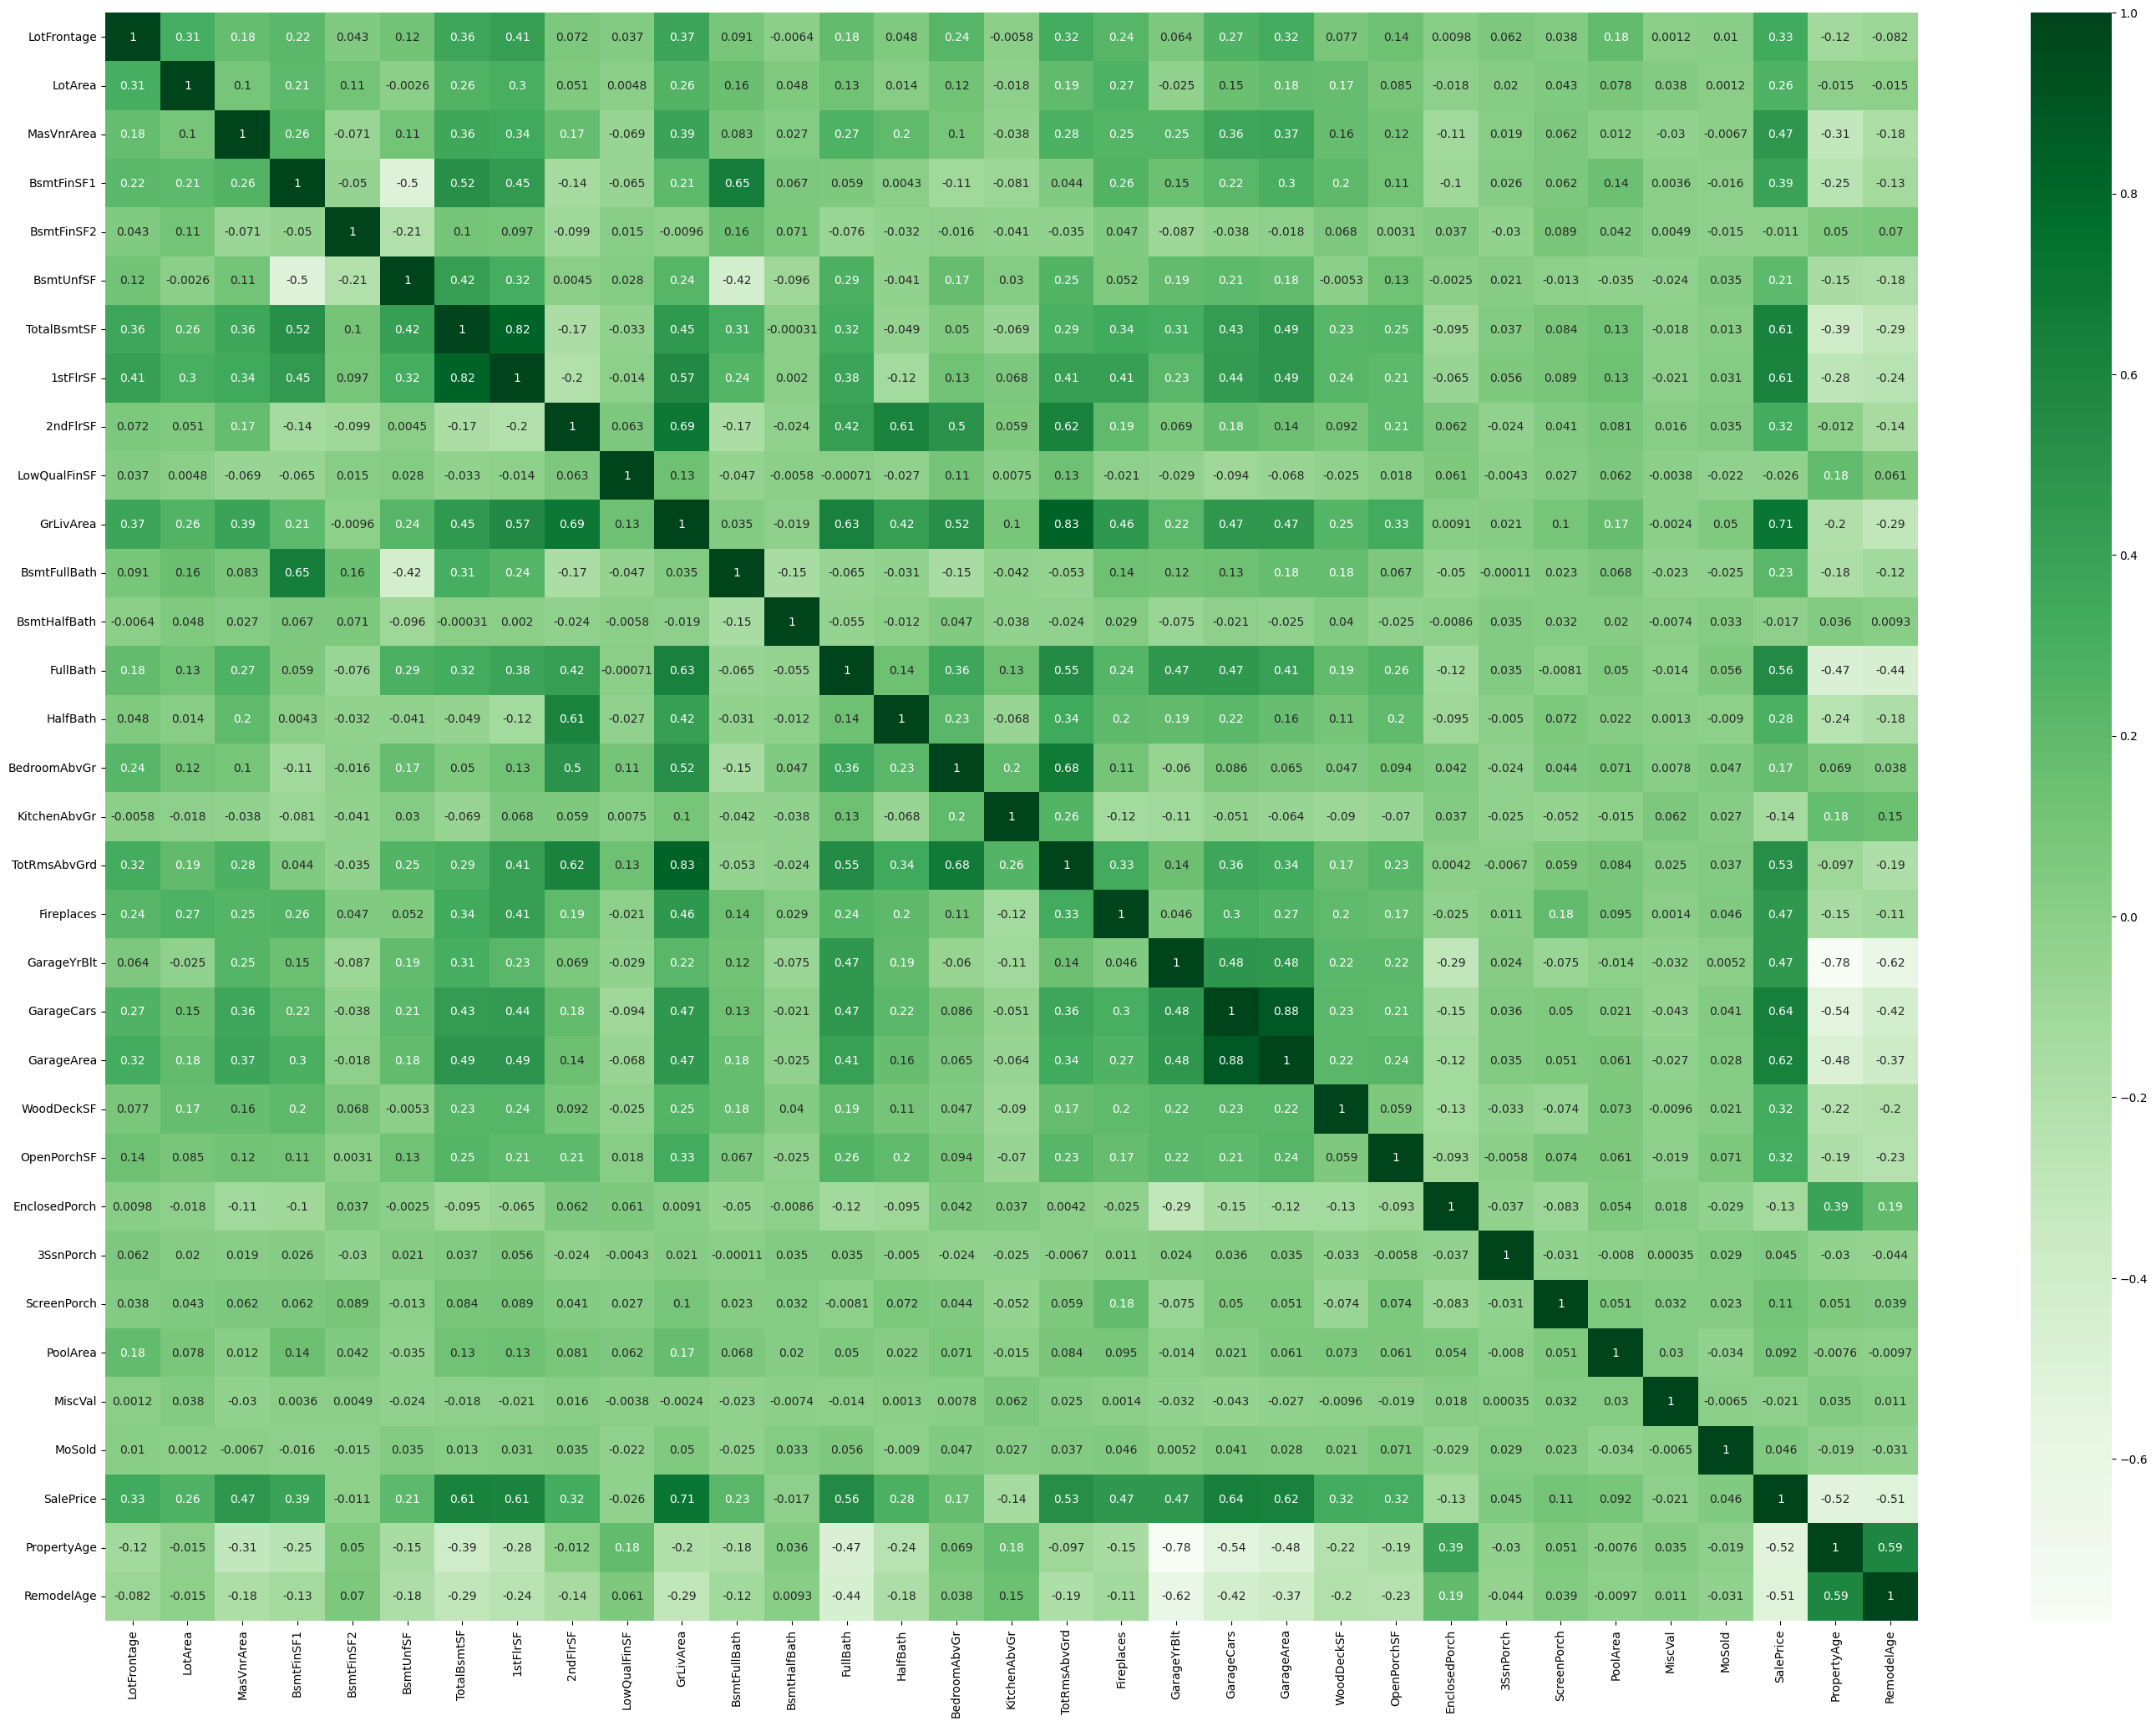

In [168]:
plt.figure(figsize=(35,25))
sns.heatmap(housingData_num.corr(),cmap="Greens", annot=True)
plt.show()

#Inference:
#Many Columns are highly Correlated

#GarageYrBlt is correlated with YearBuilt
#1stFlrSF is correlated with TotalBsmtSF
#2ndFlrSF is correlated with GrLivArea
#GarageArea is correlated with GarageCars
#BsmtFullBath is correlated with BsmtFinSF1
#GrLivArea is correlated with TotRmsAbvGrd

#Sale Price is having good Positive correlation with 1stFlrSF  GrLivArea  GarageArea GarageCars
#Sale Price is having good negative correlation with PropertyAge and RemodelAge

# Removing Outliers

In [169]:
#Since Outliers are present in all contnuous variables columns,  we need to remove outliers from all of them


outliers_columns =  ['PropertyAge', 'MoSold', 'OpenPorchSF', 'WoodDeckSF','GarageArea','GrLivArea','1stFlrSF','TotalBsmtSF',
'BsmtUnfSF','BsmtFinSF1','MasVnrArea', 'LotFrontage','LotArea']
for column in housingData_num.columns:
    quantile = housingData[column].quantile(0.97)
    housingData = housingData[housingData[column] <= quantile]
    quantile = housingData[column].quantile(0.03)
    housingData = housingData[housingData[column] >= quantile]


#Outliers are cleaned




In [170]:
#Extract numerical Columns
housingData_num = housingData.select_dtypes(include=['int64', 'float64'])

#Extract Categorical variables
housingData_obj = housingData.select_dtypes(include=['object'])

In [171]:
#Creating Dummy variables for Caterogical Variables
housingData = housingData.drop(housingData_obj.columns, axis=1)
housingData_obj = pd.get_dummies(housingData_obj, drop_first=True)
housingData_obj.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,Heating_GasW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Gd,FireplaceQu_No_FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_No_Garage,GarageType_RFn,GarageType_Unf,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_No_Garage,GarageQual_TA,GarageCond_Gd,GarageCond_No_Garage,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_Shed,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [172]:
housingData = pd.concat([housingData,housingData_obj],axis=1)

# Train Test Split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
#Create Predictor Variables set
X = housingData.drop(['SalePrice'], axis=1)

In [176]:
#Create Target Variables set
y = housingData['SalePrice']

In [177]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [178]:
#Printing the shapes of Tran and Test
print(X_train.shape)
print(X_test.shape)

(382, 225)
(165, 225)


Feature Scaling

## Model Building and Evaluation

In [179]:
#Importing libraries related to Model Building and Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


In [180]:
#Scaling the Numerical variables
scaler = StandardScaler()
continous_vars = ['LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold',
        'PropertyAge']
X_train[continous_vars] = scaler.fit_transform(X_train[continous_vars])

X_test[continous_vars] = scaler.transform(X_test[continous_vars])


In [181]:
#printing Shape of Training and Test Set

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(382, 225)
(382,)
(165, 225)
(165,)


## Ridge and Lasso Regression


In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
#applying Ridge Regression with hyperparameter Labmda
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [184]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [185]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 10.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.67249450e-03  1.37360353e-02 -7.46370561e-03  2.08829528e-02
  5.98364696e-03 -4.15416715e-04  2.53692027e-02  2.15900443e-02
  2.47863850e-02  0.00000000e+00  4.28060699e-02  7.12744646e-03
  2.14589555e-03  1.79146474e-02  1.04248466e-02  3.76646699e-03
 -1.57437635e-02  7.17868850e-03  4.73084103e-03  1.12895839e-02
  1.09062271e-02  4.15940228e-03  4.91510912e-03 -3.53472341e-03
  8.37017830e-04  0.00000000e+00  6.53104264e-03  0.00000000e+00
  1.20891082e-05  5.22805655e-03 -3.49208673e-02 -1.24261253e-03
 -3.01588463e-02  0.00000000e+00  8.88505248e-03 -6.15572111e-03
 -1.04106835e-02  3.21497998e-02  0.00000000e+00 -1.06765366e-03
 -2.75849199e-03 -9.19584220e-03 -3.64604889e-03 -1.06139340e-03
  4.13620629e-03  1.26514779e-04  3.97164096e-03  1.76267054e-02
 -7.49811056e-03 -1.41002358e-02  3.64879697e-03 -1.40011224e-02
  2.27950334e-02  1.91108131e-02 -2.50647859e-03 -2.92110882e-04
 -8.31830586e-03  1.12358367e-02  7.78071783e-03 -9.18817493e-03
  2.56303061e-03 -1.61221

In [186]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9299386049880263
0.857392250589447
1.4146849355175575
1.3938598120563577
0.003703363705543344
0.008447635224583985


## Lasso

In [187]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [188]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [189]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [190]:
lasso.coef_

array([ 3.36285119e-03,  1.44620097e-02, -1.76331403e-03,  2.42871955e-02,
        2.90064770e-03, -0.00000000e+00,  2.67758874e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.02130826e-02,  6.23858789e-03,
        3.43361246e-03,  1.33140699e-02,  5.44038943e-03,  5.00604664e-03,
       -1.97364779e-02,  0.00000000e+00,  7.39768397e-03,  8.25518452e-03,
        8.41380339e-03,  6.18446205e-03,  3.87303110e-03, -0.00000000e+00,
        1.35347276e-03,  0.00000000e+00,  4.77127686e-03,  0.00000000e+00,
        1.58041677e-05,  3.67564733e-03, -4.59994675e-02, -1.28693940e-03,
       -2.12284633e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  7.02995280e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.29734150e-02,  

In [191]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9148713154460816
0.8455927141659441
1.7189247744535006
1.5091894465930271
0.004499803074485604
0.009146602706624407


In [192]:
# Creating a table which contain all the metrics

rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.93,0.91
1,R2 Score (Test),0.86,0.85
2,RSS (Train),1.41,1.72
3,RSS (Test),1.39,1.51
4,MSE (Train),0.06,0.07
5,MSE (Test),0.09,0.10


## Lets observe the changes in the coefficients after regularization

In [193]:
betas = pd.DataFrame(index=X.columns)

In [194]:
betas.rows = X.columns

In [195]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

# Top 5 Predictor Variables using Ridge

In [196]:
betas['Ridge'].sort_values(ascending=False)[0:5]

OverallQual_8     0.05
GrLivArea         0.04
Functional_Typ    0.04
Condition1_Norm   0.04
MSSubClass_70     0.03
Name: Ridge, dtype: float64

# Top 5 Predictor Variables using Lasso

In [197]:
betas['Lasso'].sort_values(ascending=False)[0:5]

GrLivArea        0.08
MSSubClass_70    0.07
OverallQual_8    0.07
Functional_Typ   0.05
OverallCond_7    0.03
Name: Lasso, dtype: float64

In [198]:
#Describing the Ridge Coeffiencients in terms of targer, we need to change to exponent of betas, i.e., e to power of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending = False)[0:5]

OverallQual_8     1.05
GrLivArea         1.04
Functional_Typ    1.04
Condition1_Norm   1.04
MSSubClass_70     1.03
Name: Ridge, dtype: float64

In [199]:
#Describing the Ridge Coeffiencients in terms of targer, we need to change to exponent of betas, i.e., e to power of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending = False)[0:5]

GrLivArea        1.08
MSSubClass_70    1.07
OverallQual_8    1.07
Functional_Typ   1.05
OverallCond_7    1.03
Name: Lasso, dtype: float64

# Inferences
Sale Price Depends on Neighborhood_Crawfor, OverallQual_8, GrLivArea, Functional_Typ, Exterior1st_BrkFace

Optimal Value of Lambda for Ridge is 10
Optimal Value of lambda for Lasso is 0.001


In terms of Prices, below can be inferences:
GrLivArea           --  If Living Area increases by 1 SQFT then  prices can increase from 1.04 to 1.08 times
MSSubClass_70       --  If type of Dwelling involved is 2-STORY 1945 & OLDER  then  prices can increase from 1.03 to 1.07 times
OverallCond_7       --  If Overall condition is Good , Very Goodor Excellent then  prices can increase from 1.03 to 1.07 times
Functional_Typ      --  If Home has typical functionalities  then  prices can increase from 1.05 times
Condition1_Norm --  If Proximity to various conditions is Normal then  prices can increase from 1.04 times